# Telecom Churn Case Study

# Problem Statement

- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
- For many incumbent operators, retaining high profitable customers is the number one business goal.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
- In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor # for VIF

# Filtering out the warnings
import warnings
warnings.filterwarnings("ignore")

# For all the columns and rows printed properly
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",300)

In [2]:
#Reading csv file using read_csv
df=pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Check the number of rows and columns in the dataframe
df.shape

(99999, 226)

In [4]:
# Check the column-wise info of the dataframe
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
# Check the summary for the numeric columns 
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
#Checking total columns in the dataframe
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

## Step 2: Data Quality Check 

#### Checking Missing Values

In [7]:
# checking missing value percentage wise in each column
print((df.isnull().sum().sort_values(ascending=False) * 100/df.shape[0]).round(2))

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

#### Imputing missing value with zero 

In [8]:
# From describe summary we have seen that some of columns have minimum value is 1
df1=df
col_one=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

df1[col_one].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [9]:
# Checking null values in col_one list
df1[col_one].isnull().sum()/df1.shape[0]

total_rech_data_6     0.748467
total_rech_data_7     0.744287
total_rech_data_8     0.736607
total_rech_data_9     0.740777
max_rech_data_6       0.748467
max_rech_data_7       0.744287
max_rech_data_8       0.736607
max_rech_data_9       0.740777
av_rech_amt_data_6    0.748467
av_rech_amt_data_7    0.744287
av_rech_amt_data_8    0.736607
av_rech_amt_data_9    0.740777
dtype: float64

In [10]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
df1.loc[df1.total_rech_data_6.isnull() & df1.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [11]:
# impute missing values with 0
df1[col_one] = df1[col_one].apply(lambda x: x.fillna(0))

In [12]:
# checking missing value percentage wise in each column
print((df1.isnull().sum().sort_values(ascending=False) * 100/df1.shape[0]).round(2))

fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
arpu_3g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
count_rech_3g_7             74.43
fb_user_7                   74.43
date_of_last_rech_data_7    74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
night_pck_user_7            74.43
arpu_3g_7                   74.43
arpu_3g_9                   74.08
count_rech_2g_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
count_rech_3g_9             74.08
arpu_3g_8                   73.66
arpu_2g_8                   73.66
date_of_last_rech_data_8    73.66
count_rech_3g_8             73.66
fb_user_8                   73.66
night_pck_user_8            73.66
count_rech_2g_8             73.66
std_ic_t2o_mou_9             7.75
roam_og_mou_9 

#### Dropping Columns which have no variance

checking the columns with no variance in their values and drop such columns


In [13]:
# Checking value counts for all columns and analyse variance in columns
for col in df1.columns:
    print(df1[col].value_counts().head())

7002374769    1
7001115332    1
7000945323    1
7001852588    1
7000146605    1
Name: mobile_number, dtype: int64
109    99999
Name: circle_id, dtype: int64
0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
7/31/2014    99398
Name: last_date_of_month_7, dtype: int64
8/31/2014    98899
Name: last_date_of_month_8, dtype: int64
9/30/2014    98340
Name: last_date_of_month_9, dtype: int64
 0.0     3731
 20.0      99
-5.0       96
 1.0       69
 1.5       60
Name: arpu_6, dtype: int64
 0.0     3862
-5.0      153
 20.0      76
 1.5       52
 1.0       51
Name: arpu_7, dtype: int64
 0.00    5622
-5.00     205
 1.00      66
 0.10      51
 0.01      50
Name: arpu_8, dtype: int64
 0.00    9069
-5.00     278
 1.00      75
 1.50      75
 0.01      73
Name: arpu_9, dtype: int64
0.00    8928
0.33      80
0.26      76
0.48      75
0.31      72
Name: 

0.00    11505
0.36      105
0.53       99
0.43       96
0.40       95
Name: loc_ic_t2t_mou_8, dtype: int64
0.00    11126
0.41      103
0.48       98
0.78       98
0.21       93
Name: loc_ic_t2t_mou_9, dtype: int64
0.00    6269
0.58      43
0.31      42
0.30      41
0.26      39
Name: loc_ic_t2m_mou_6, dtype: int64
0.00    5673
2.36      39
0.76      38
0.93      37
0.21      36
Name: loc_ic_t2m_mou_7, dtype: int64
0.00    5459
0.46      38
0.41      37
0.98      35
3.99      33
Name: loc_ic_t2m_mou_8, dtype: int64
0.00    5339
0.38      40
0.36      37
0.56      37
0.53      36
Name: loc_ic_t2m_mou_9, dtype: int64
0.00    39141
0.23      229
0.21      228
0.33      217
0.28      216
Name: loc_ic_t2f_mou_6, dtype: int64
0.00    38362
0.50      248
0.41      247
0.31      242
0.48      241
Name: loc_ic_t2f_mou_7, dtype: int64
0.00    37341
0.45      286
0.38      244
0.41      243
0.33      241
Name: loc_ic_t2f_mou_8, dtype: int64
0.00    35854
0.25      261
0.41      256
0.26      247
0

0.0    15788
1.0     7001
2.0     1847
3.0      566
4.0      278
Name: count_rech_3g_9, dtype: int64
0.0      74846
154.0     3718
252.0     1889
198.0     1074
25.0       962
Name: av_rech_amt_data_6, dtype: int64
0.0      74428
154.0     3686
252.0     1869
198.0     1165
25.0       825
Name: av_rech_amt_data_7, dtype: int64
0.0      73660
154.0     3320
252.0     2022
198.0     1212
25.0      1055
Name: av_rech_amt_data_8, dtype: int64
0.0      74077
252.0     2105
175.0     1948
25.0      1339
154.0     1133
Name: av_rech_amt_data_9, dtype: int64
0.00    77731
0.01      103
0.02       70
0.03       53
0.07       42
Name: vol_2g_mb_6, dtype: int64
0.00    77474
0.01       94
0.02       79
0.03       47
0.04       44
Name: vol_2g_mb_7, dtype: int64
0.00    77214
0.01      105
0.02       82
0.03       62
0.05       47
Name: vol_2g_mb_8, dtype: int64
0.00    78279
0.01      122
0.02       82
0.03       70
0.04       67
Name: vol_2g_mb_9, dtype: int64
0.00    85417
0.01       20
0.03   

- Insights: From above we have seen that some columns have only unique values mean there is no variance in that cloumns,no information for further analyse, we can drop these

In [14]:
# Dropping unique value variables
var=['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6',
     'last_date_of_month_7','last_date_of_month_8','std_og_t2c_mou_6','std_og_t2c_mou_7',
     'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'
    ]
df1=df1.drop(var,axis=1)

In [15]:
# checking missing value percentage wise in each column
print((df1.isnull().sum().sort_values(ascending=False) * 100/df1.shape[0]).round(2))

arpu_3g_6                   74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
count_rech_3g_7             74.43
date_of_last_rech_data_7    74.43
count_rech_2g_7             74.43
arpu_3g_7                   74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
fb_user_7                   74.43
count_rech_3g_9             74.08
count_rech_2g_9             74.08
arpu_2g_9                   74.08
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
arpu_3g_9                   74.08
fb_user_9                   74.08
arpu_2g_8                   73.66
night_pck_user_8            73.66
arpu_3g_8                   73.66
count_rech_2g_8             73.66
count_rech_3g_8             73.66
date_of_last_rech_data_8    73.66
fb_user_8                   73.66
std_ic_mou_9                 7.75
isd_ic_mou_9  

In [16]:
# Removing columns in which percentage of missing value is greater than 30%

df1=df1.loc[:,df1.isnull().mean()<=0.30]

# checking rows and columns
df1.shape

(99999, 185)

In [17]:
# checking missing value percentage wise in each column
print((df1.isnull().sum().sort_values(ascending=False) * 100/df1.shape[0]).round(2))

std_og_t2c_mou_9        7.75
loc_og_t2t_mou_9        7.75
loc_og_t2f_mou_9        7.75
loc_og_t2c_mou_9        7.75
loc_og_mou_9            7.75
std_og_t2t_mou_9        7.75
std_og_t2m_mou_9        7.75
std_og_t2f_mou_9        7.75
ic_others_9             7.75
isd_ic_mou_9            7.75
spl_ic_mou_9            7.75
std_og_mou_9            7.75
std_ic_mou_9            7.75
std_ic_t2o_mou_9        7.75
std_ic_t2f_mou_9        7.75
std_ic_t2m_mou_9        7.75
std_ic_t2t_mou_9        7.75
loc_ic_mou_9            7.75
loc_ic_t2f_mou_9        7.75
loc_ic_t2m_mou_9        7.75
loc_ic_t2t_mou_9        7.75
isd_og_mou_9            7.75
og_others_9             7.75
loc_og_t2m_mou_9        7.75
spl_og_mou_9            7.75
offnet_mou_9            7.75
onnet_mou_9             7.75
roam_ic_mou_9           7.75
roam_og_mou_9           7.75
isd_ic_mou_8            5.38
std_ic_mou_8            5.38
ic_others_8             5.38
offnet_mou_8            5.38
spl_og_mou_8            5.38
spl_ic_mou_8  

- Insights: From above we can see that some of columns have null values, we can replace null values of categorical columns by mode, and numerical columns by median

In [18]:
# Checking categorical columns 
cat_cols=df1.dtypes
cat_cols=cat_cols[(cat_cols=="object")].index.tolist()
cat_cols

['last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [19]:
# Imputing null values for categorical variable by mode
for cols in cat_cols:
    df1[cols].fillna((df1[cols].mode()[0]),inplace=True)

In [20]:
# Converting date columns to datetime format
date_cols=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_date_of_month_9','date_of_last_rech_9']
for cols in date_cols:
    df1[cols]=pd.to_datetime(df1[cols]).dt.day

In [21]:
# Checking numerical columns 
num_cols=df1.dtypes
num_cols=num_cols[(num_cols=="float64")|(num_cols=="int64")].index.tolist()
num_cols

['mobile_number',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 '

In [22]:
# Imputing null values for numerical variable by median
for cols in num_cols:
    df1[cols].fillna((df1[col].median()),inplace=True)

In [23]:
# checking missing value percentage wise in each column
print((df1.isnull().sum().sort_values(ascending=False) * 100/df1.shape[0]).round(2).head())
print(df1.shape)

sep_vbc_3g      0.0
std_og_mou_8    0.0
spl_og_mou_9    0.0
spl_og_mou_8    0.0
spl_og_mou_7    0.0
dtype: float64
(99999, 185)


## Step 3:  Filter High-Value Customer(HVC)

Calculating total data recharge amount and calculate average recharge done by customer in june & july


In [24]:
# total data recharge calculation
df1['total_data_6']=df1['total_rech_data_6']*df1['av_rech_amt_data_6']
df1['total_data_7']=df1['total_rech_data_7']*df1['av_rech_amt_data_7']

In [25]:
# Average recharge done by customer in june & july
df1['total_data_rech_6']=df1['total_data_6']+df1['total_rech_amt_6']
df1['total_data_rech_7']=df1['total_data_7']+df1['total_rech_amt_7']


df1['total_rech_amt_good_phase']=(df1['total_data_rech_6']+df1['total_data_rech_7'])/2

# Retain only those customers whose recharged their mobiles with greater than 70 percentile amount
df1=df1[df1['total_rech_amt_good_phase']>df1['total_rech_amt_good_phase'].quantile(0.70)]
df1 = df1.reset_index(drop=True)

print(df1.shape)

(29953, 190)


In [26]:
# Dropping columns which are created for high value customers
 
df1=df1.drop(['total_rech_amt_good_phase','total_data_rech_6','total_data_rech_7','total_data_6','total_data_7'],axis=1)


## Step 4: Derive Churn

In [27]:
# Calculating total incoming,outgoing minutes of usage and 2g , 3g  data consumption
df1['total_9']=df1['total_og_mou_9']+df1['total_ic_mou_9']+df1['vol_2g_mb_9']+df1['vol_3g_mb_9']

In [28]:
# Creating churn variable for those who have used neither calls nor internet in month of september
df1['churn']=np.where(df1['total_9']==0,1,0)
df1['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [29]:
#Checking Imbalance in dataframe from different aspects
df1.churn.value_counts(normalize=True)*100

0    91.877274
1     8.122726
Name: churn, dtype: float64

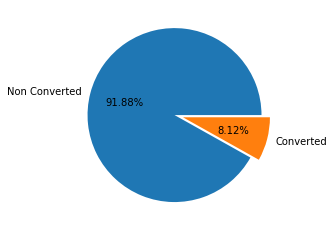

In [30]:
plt.pie(df1.churn.value_counts(normalize=True),explode=(0,0.1),labels=["Non Converted","Converted"],autopct="%1.2f%%")
plt.show()

- Insights: There is significant data imbalance w.r.t. the target variable 'churn'. Hence we need to do some resampling before applying any models on the dataset

#### Churn Rate

In [31]:
#Conversion Rate
churn_rate = (sum(df1['churn'])/len(df1['churn'].index))*100
churn_rate

8.122725603445398

#### Dropping columns related to 9 month

In [32]:
# Dropping columns 
df1=df1.drop(['total_9'],axis=1)

In [33]:
# Dropping columns related to 9 month
print(df1.shape)

col_9=[col for col in df1.columns if '_9' in col]
df1=df1.drop(col_9,axis=1)
df1=df1.drop("sep_vbc_3g",1)

print(df1.shape)

(29953, 186)
(29953, 138)


## Step :5 Data Preparation

### Derived Variables

- Median value of Internet usage of 2G volume and 3G volume across 6,7,8 months was created to capture the churn rate as it was observed majority of the churn happens when the internet usage pattern shows a decline

In [34]:
# Median value of Internet usage of 2G volume and 3G volume across 6,7,8 months was create
df1['internet_vol'] = df1[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)
df1['internet_vol'] = df1.internet_vol.map(lambda x: 1 if x == 0 else 0)
# Dropping used columns
df1 = df1.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], 1)

- From Data dictionary: aon is Age on network - number of days the customer is using the operator T network, this variable was used to create tenure range. It was observed larger the tenure, lesser was the churn - as customers who are newly acquired to the network churned more as compared to the old customers.

In [35]:
tenure=df1.copy()

In [36]:
# Creating tenure variable
tenure['tenure'] = df1['aon']/30
tenure['tenure'].head()

bucket = [0, 6, 12, 24, 60, 61]
bucket_label = [ '0-6 Months', '6-2 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure['tenure_range'] = pd.cut(tenure['tenure'], bucket, labels=bucket_label)
tenure['tenure_range'].head()

0       2-5 Yrs
1       2-5 Yrs
2    6-2 Months
3       1-2 Yrs
4       1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-2 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

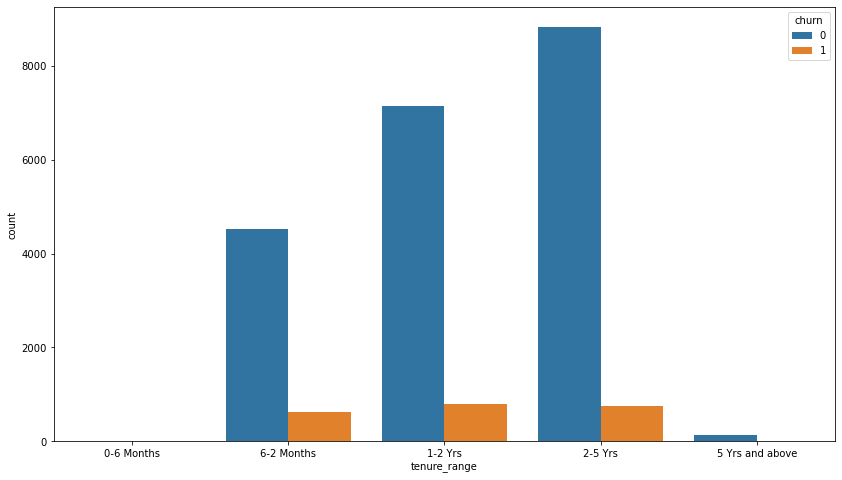

In [37]:
# plotting tenure range 
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure)
plt.show()

- Insights: for long time tenure lesser the churn

### Exploratory Data Analysis

In [38]:
#Checking the columns of dataset
df1.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn', 'internet_vol'],
      dtype='object', length=133)

In [39]:
#Checking the datatype of every column
cat_col = df1.dtypes
cat_col

mobile_number            int64
arpu_6                 float64
arpu_7                 float64
arpu_8                 float64
onnet_mou_6            float64
onnet_mou_7            float64
onnet_mou_8            float64
offnet_mou_6           float64
offnet_mou_7           float64
offnet_mou_8           float64
roam_ic_mou_6          float64
roam_ic_mou_7          float64
roam_ic_mou_8          float64
roam_og_mou_6          float64
roam_og_mou_7          float64
roam_og_mou_8          float64
loc_og_t2t_mou_6       float64
loc_og_t2t_mou_7       float64
loc_og_t2t_mou_8       float64
loc_og_t2m_mou_6       float64
loc_og_t2m_mou_7       float64
loc_og_t2m_mou_8       float64
loc_og_t2f_mou_6       float64
loc_og_t2f_mou_7       float64
loc_og_t2f_mou_8       float64
loc_og_t2c_mou_6       float64
loc_og_t2c_mou_7       float64
loc_og_t2c_mou_8       float64
loc_og_mou_6           float64
loc_og_mou_7           float64
loc_og_mou_8           float64
std_og_t2t_mou_6       float64
std_og_t

In [40]:
# checking continuous variables
cont_cols = [col for col in df1.columns if col not in ['churn','mobile_number']]

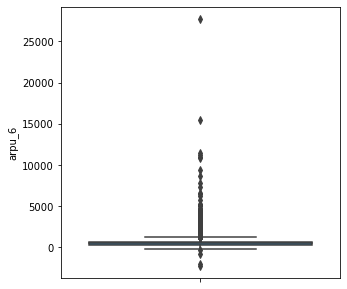

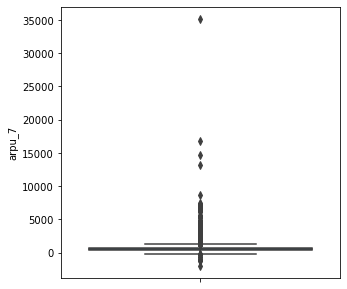

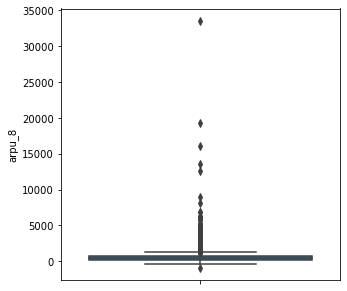

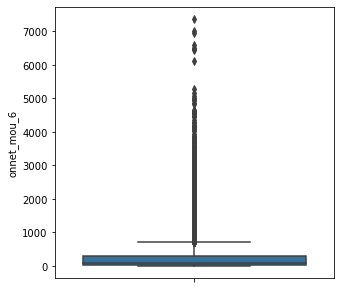

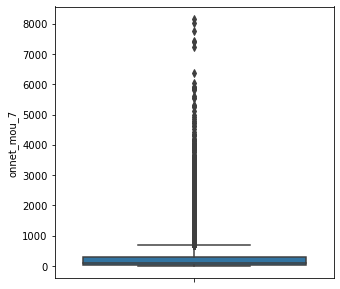

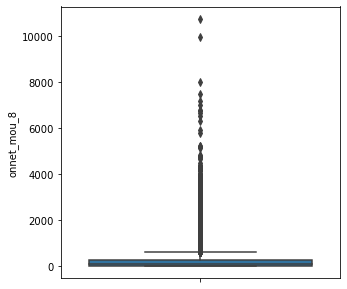

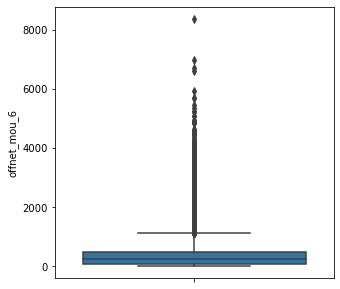

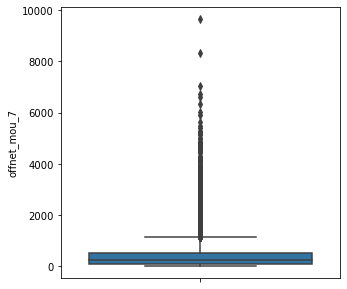

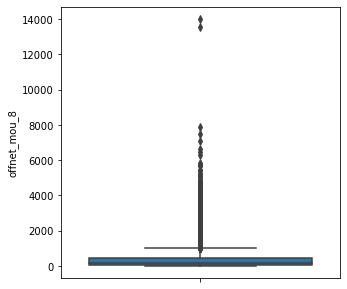

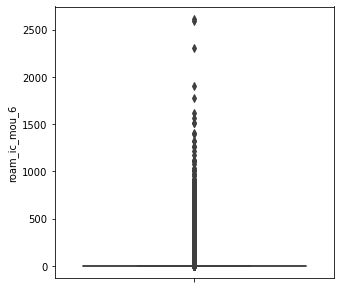

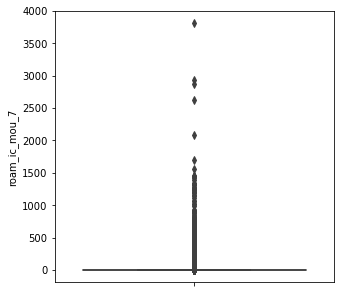

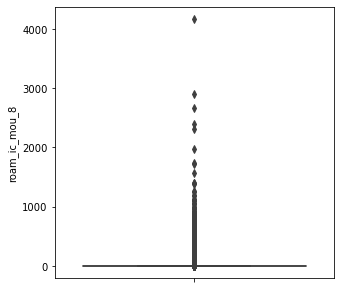

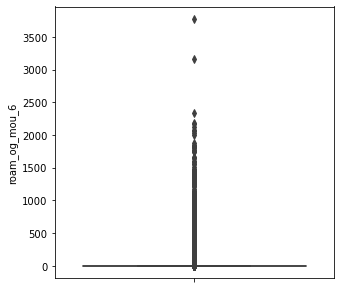

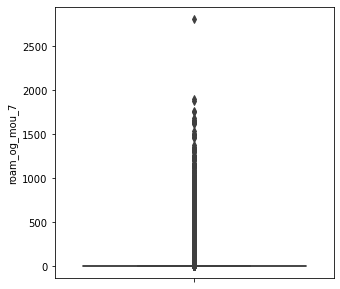

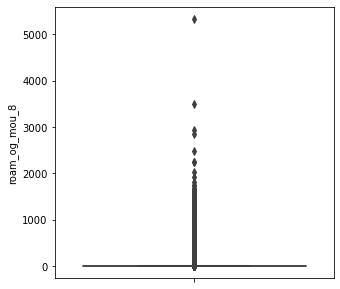

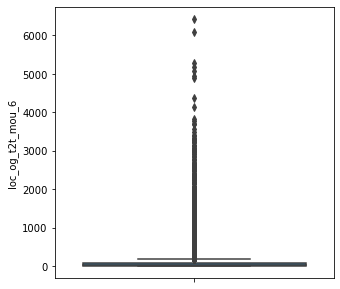

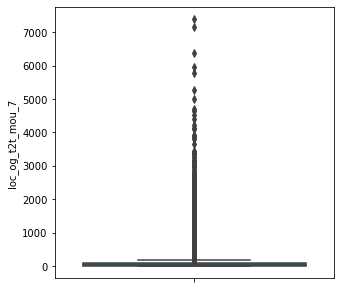

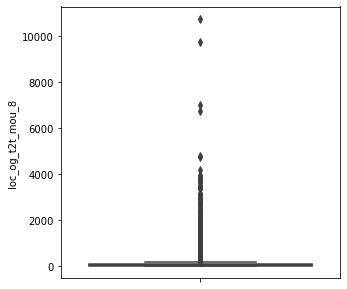

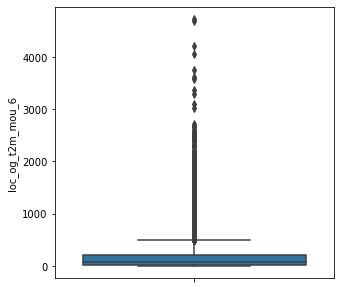

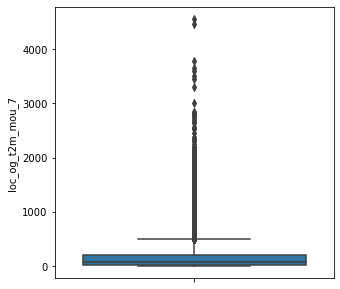

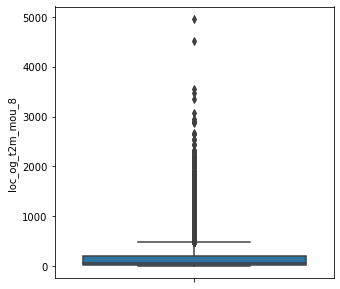

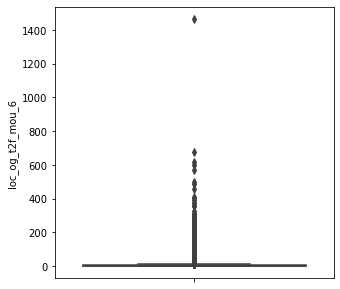

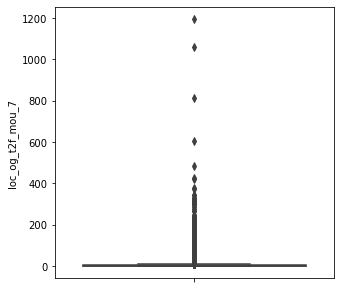

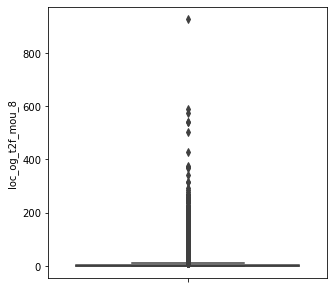

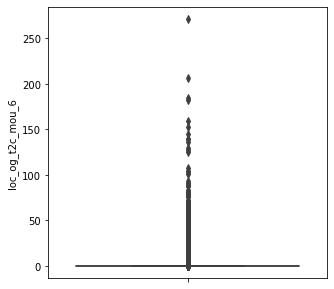

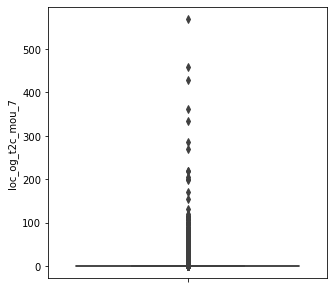

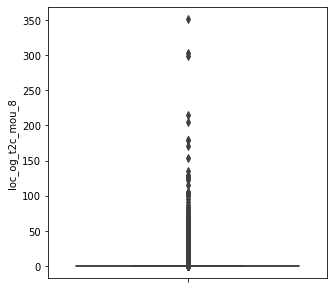

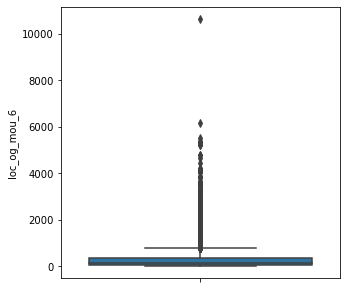

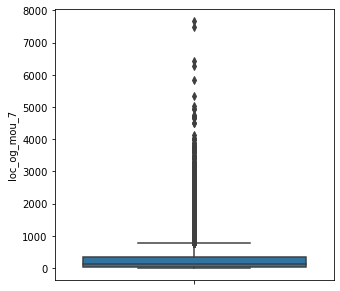

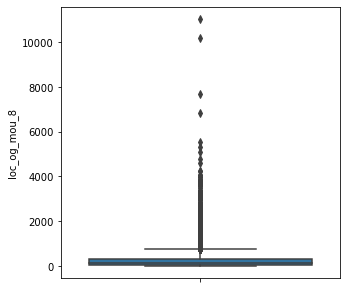

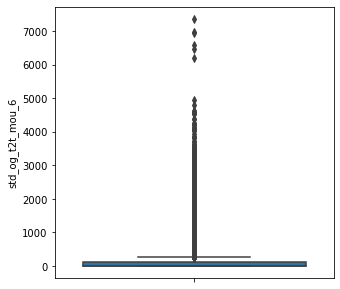

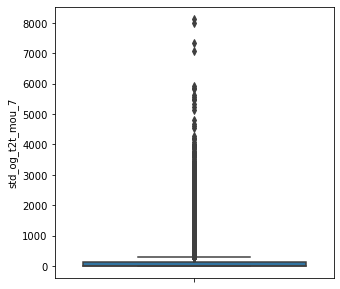

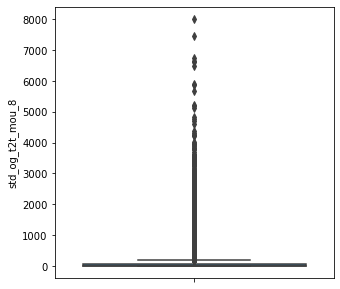

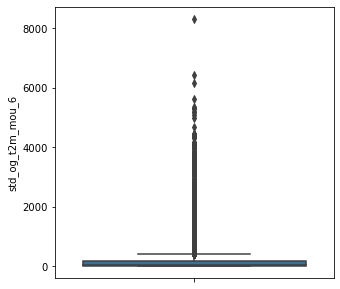

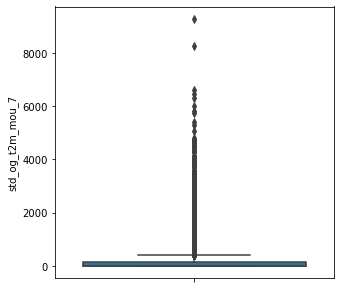

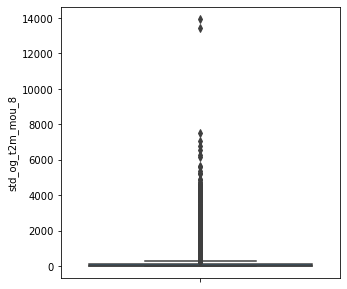

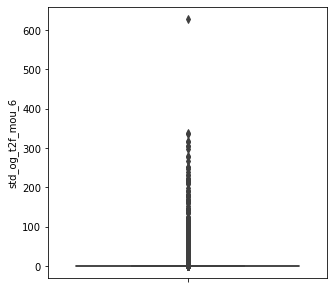

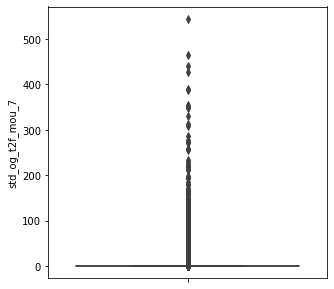

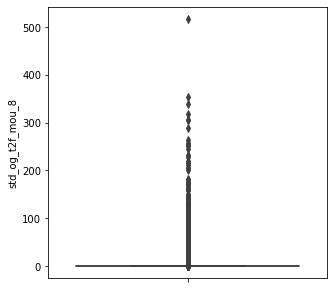

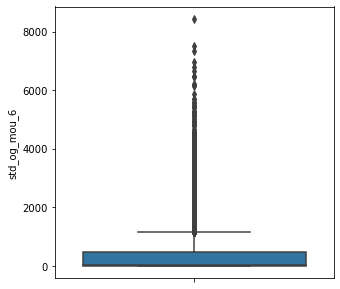

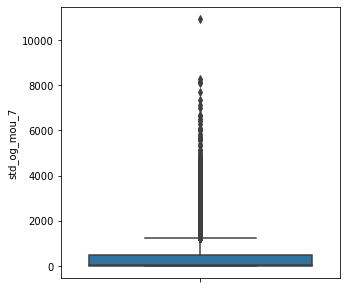

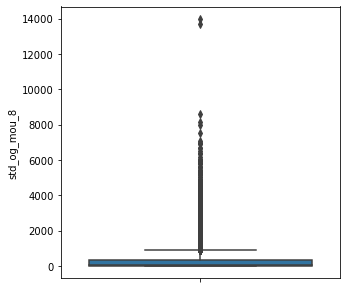

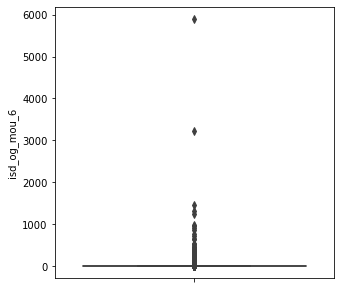

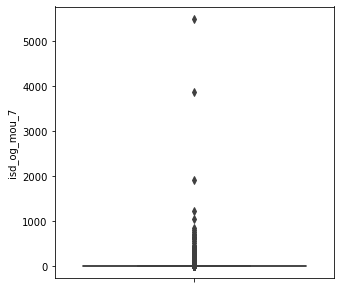

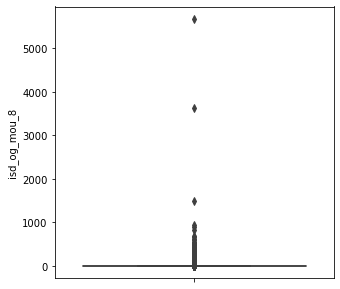

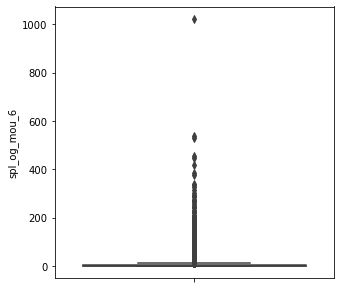

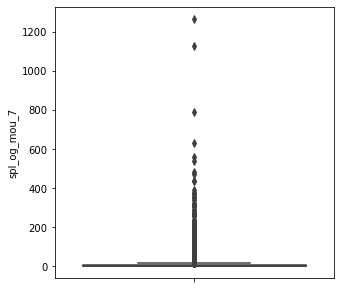

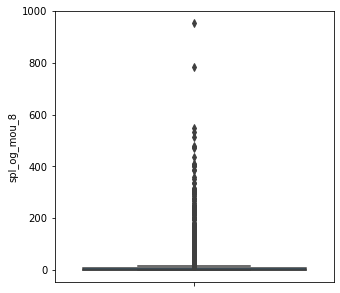

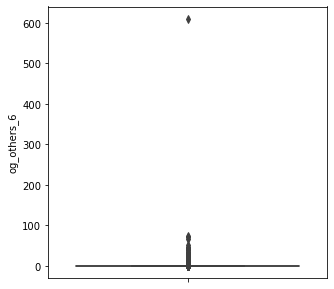

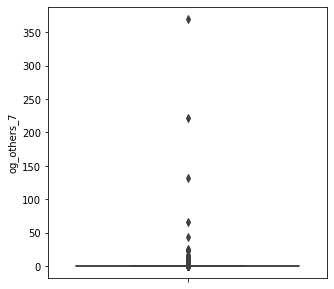

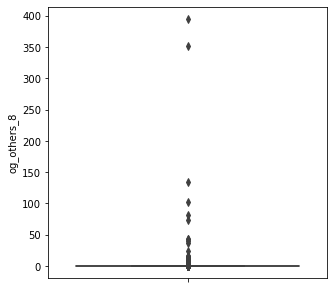

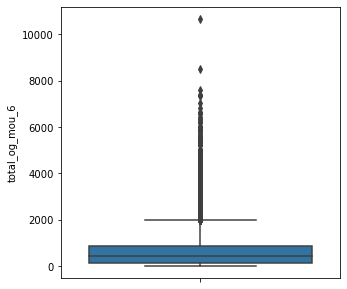

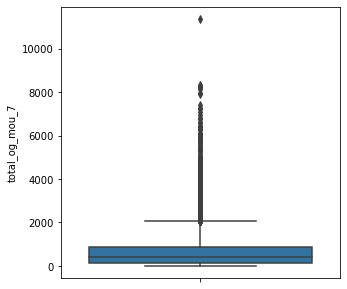

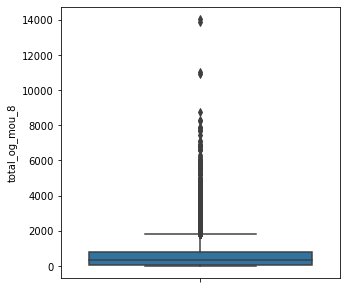

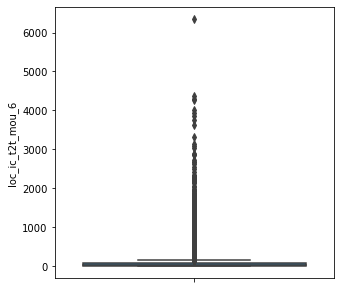

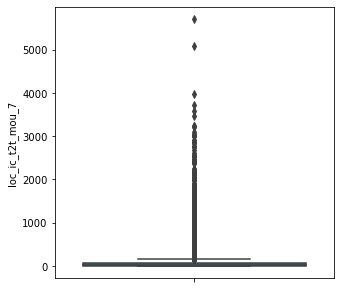

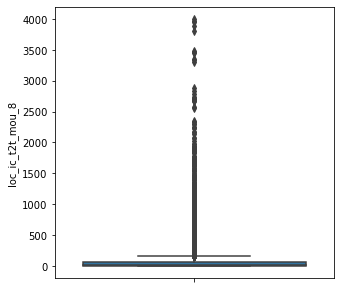

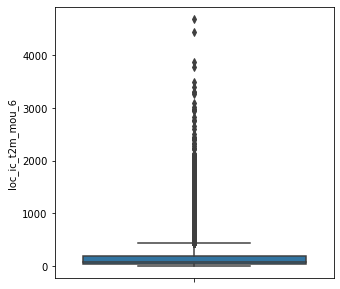

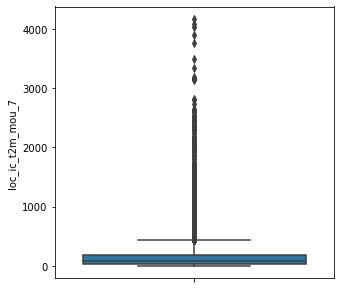

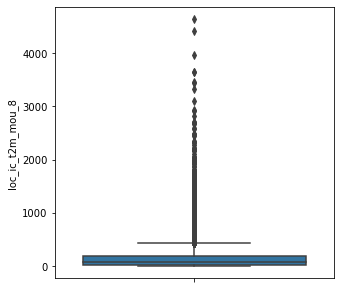

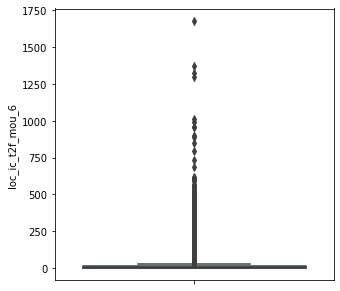

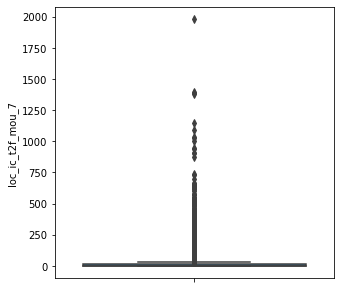

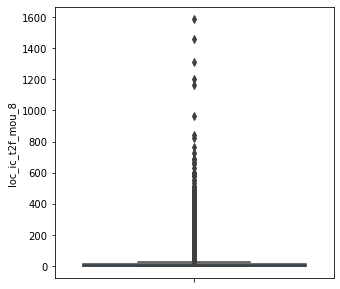

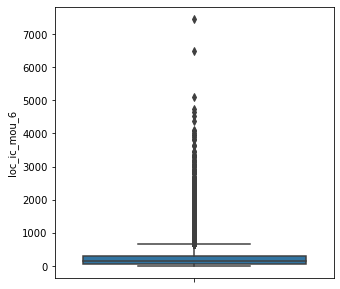

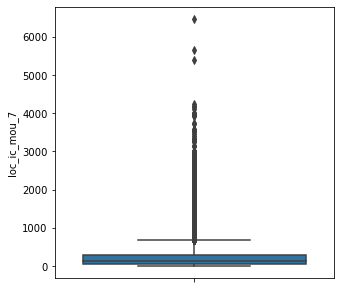

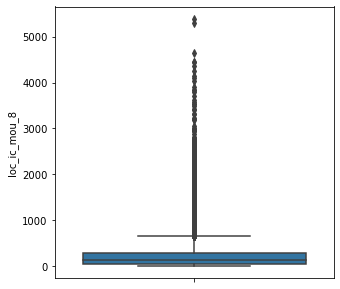

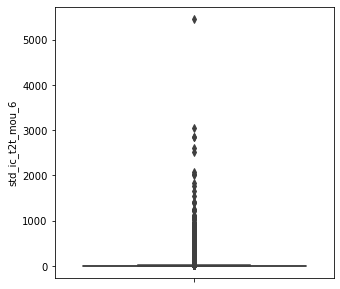

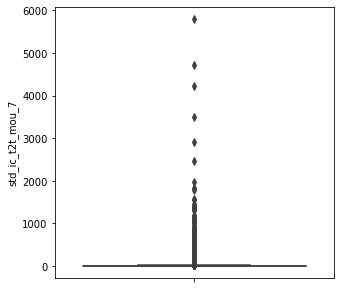

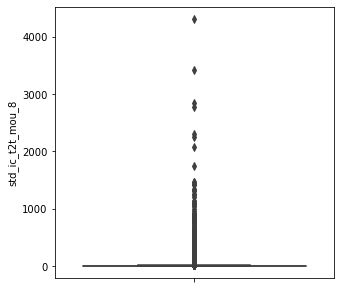

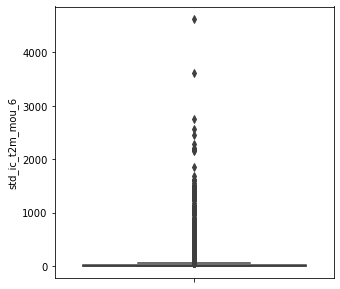

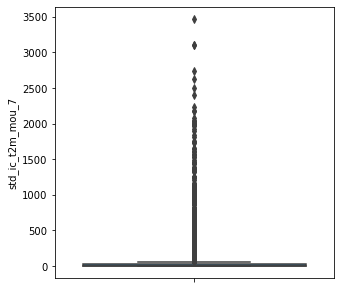

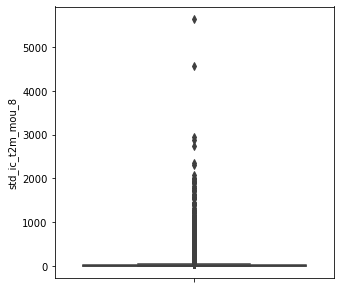

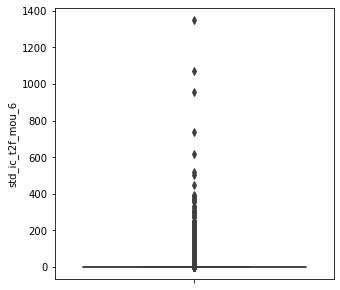

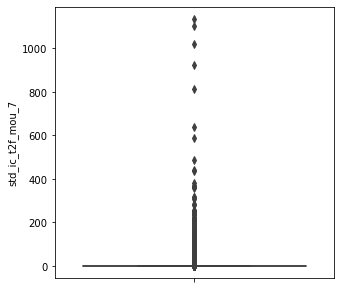

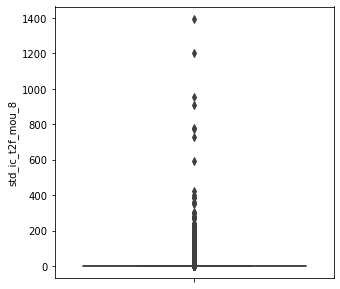

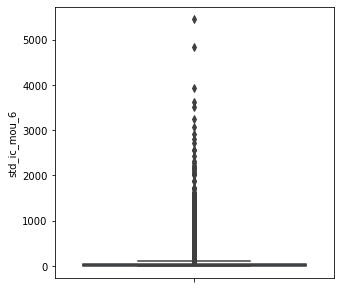

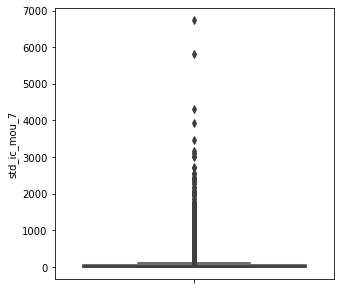

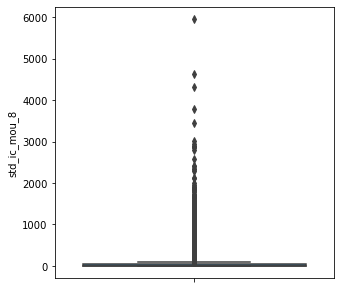

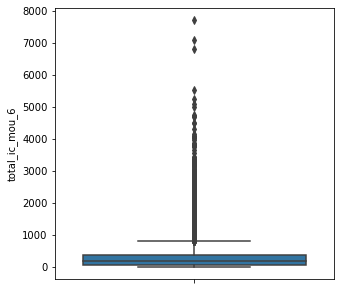

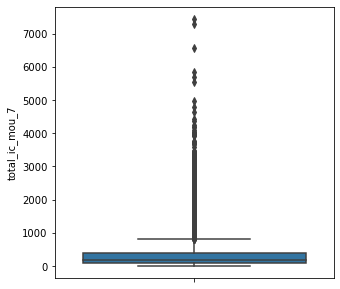

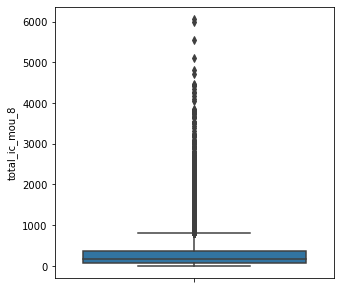

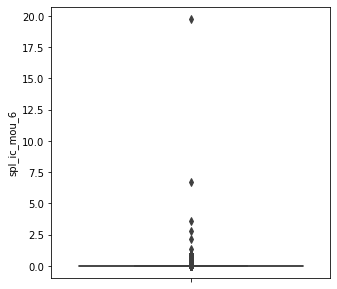

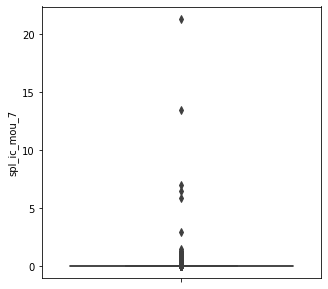

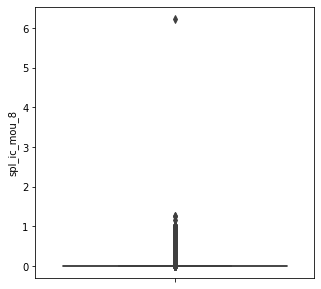

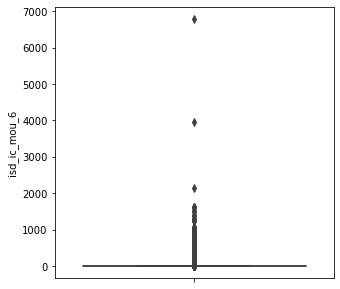

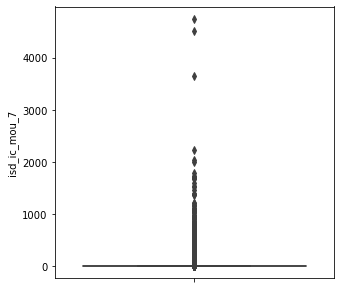

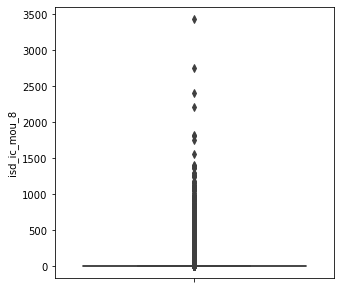

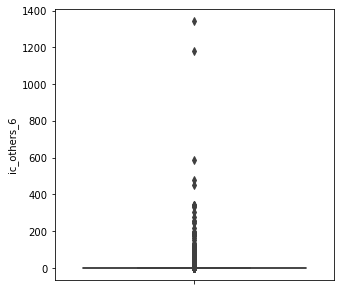

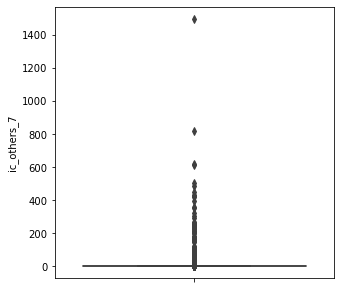

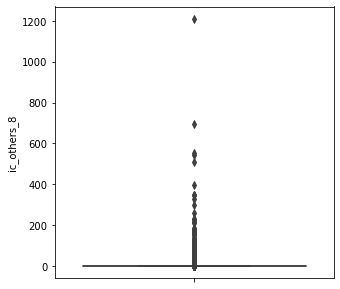

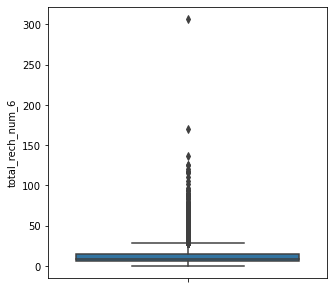

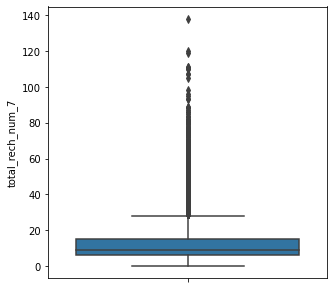

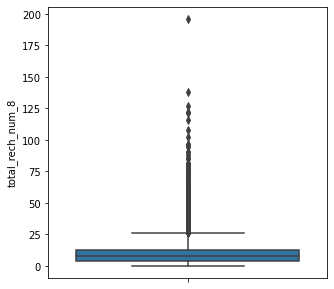

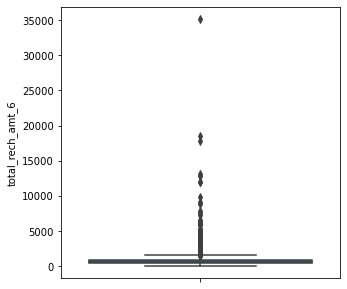

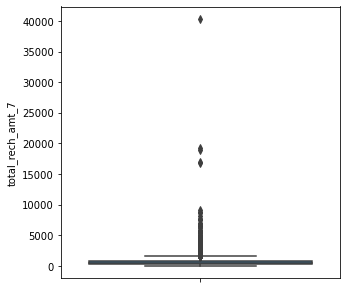

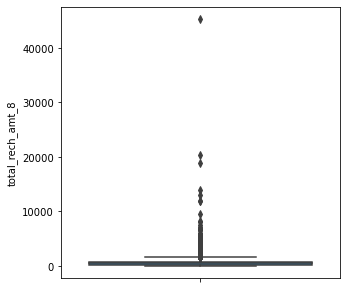

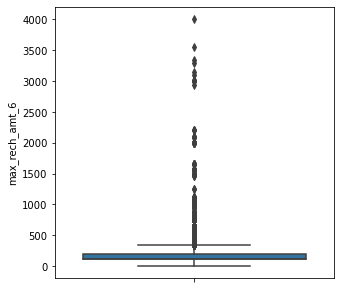

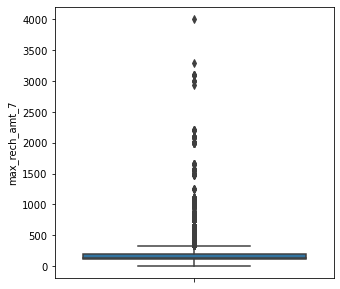

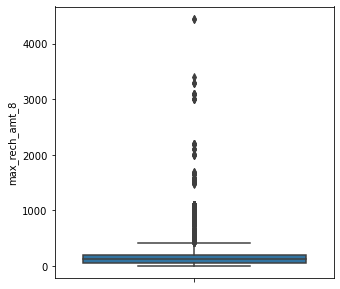

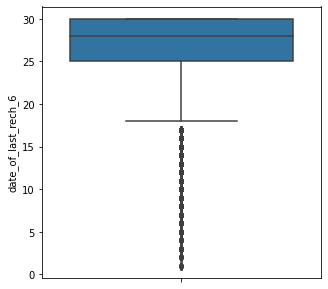

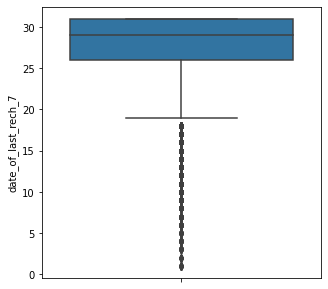

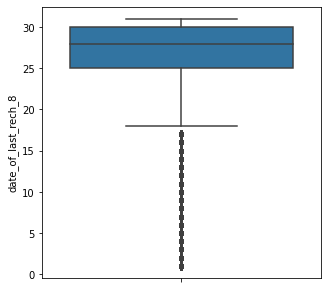

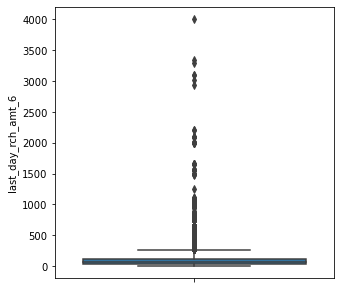

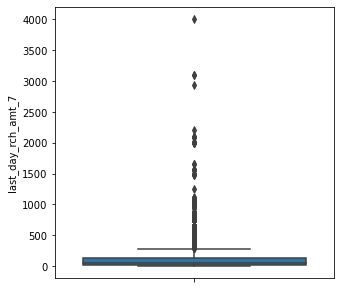

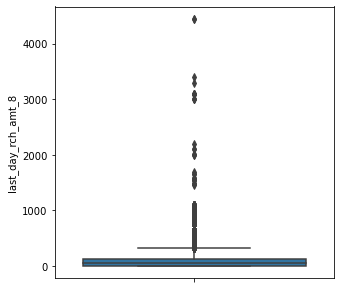

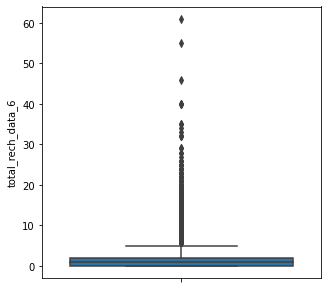

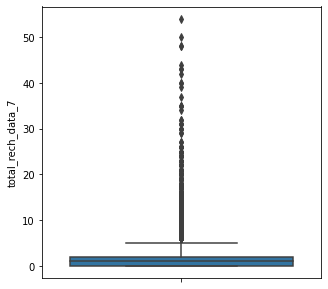

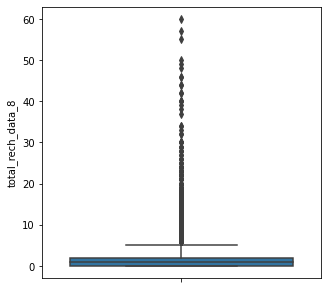

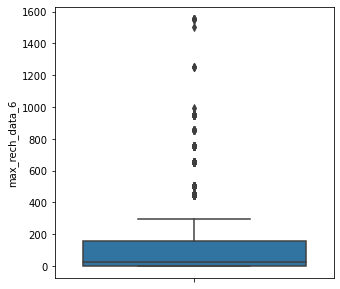

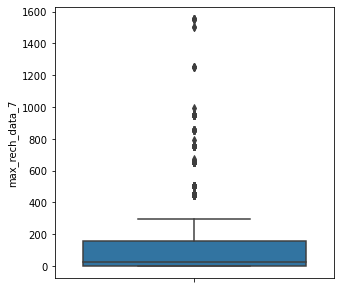

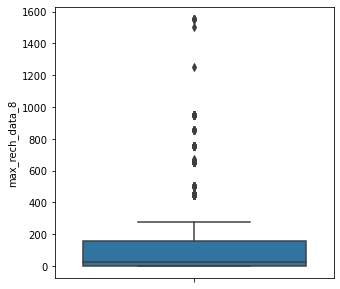

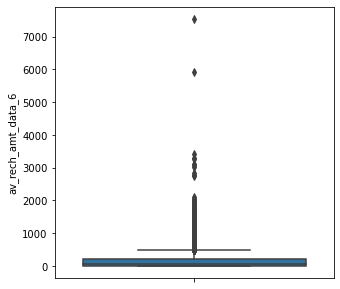

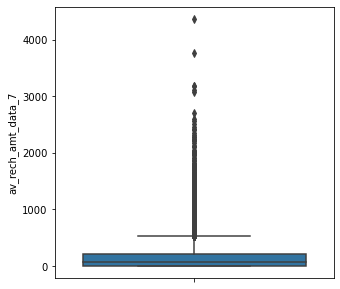

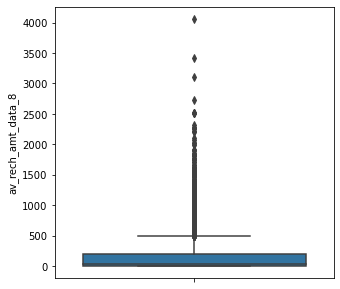

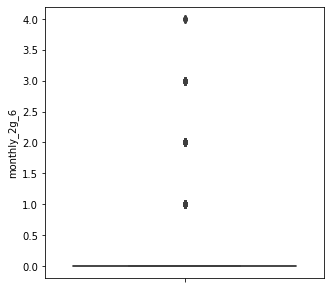

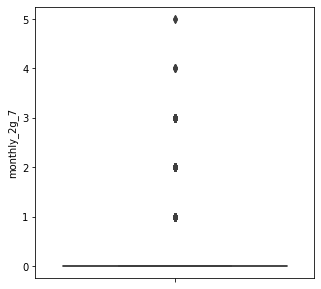

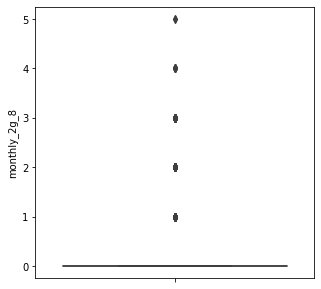

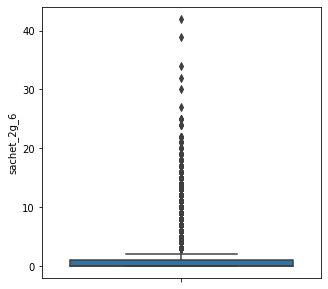

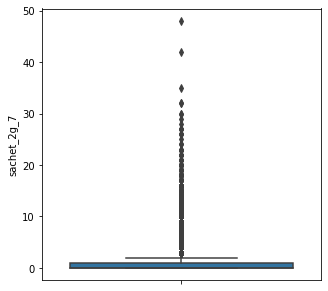

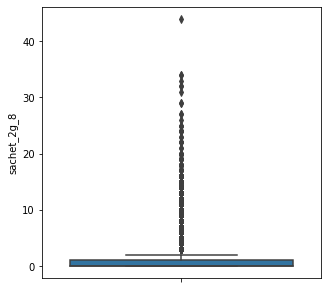

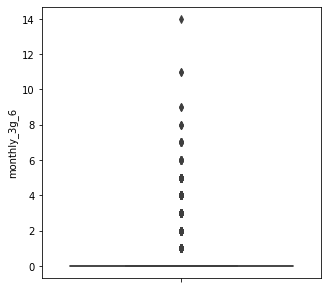

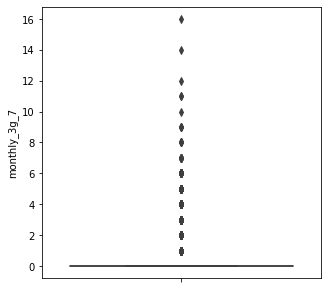

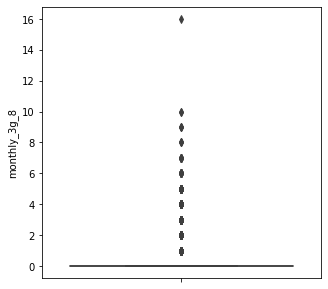

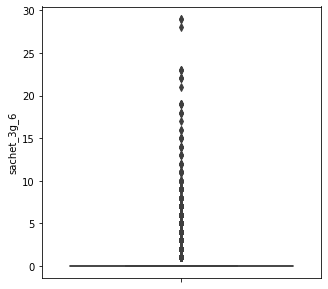

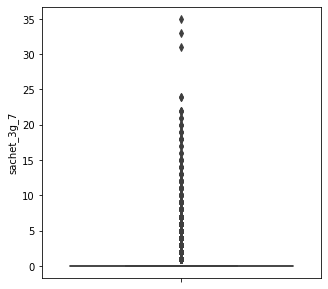

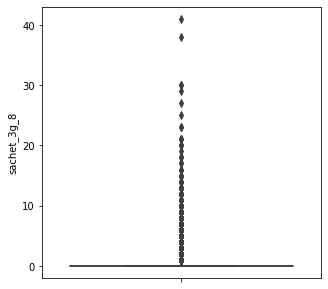

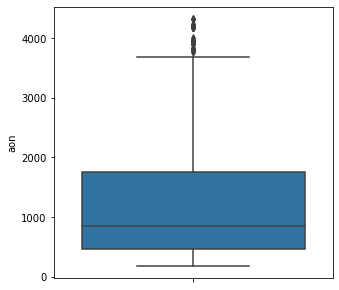

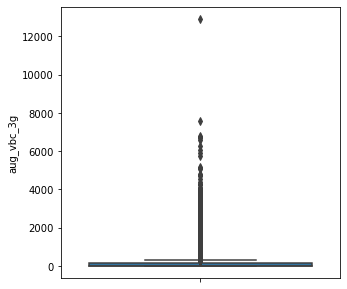

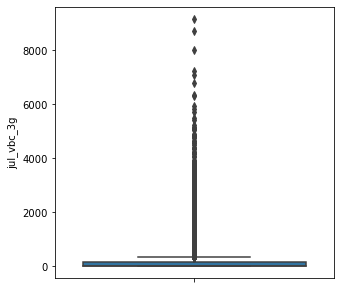

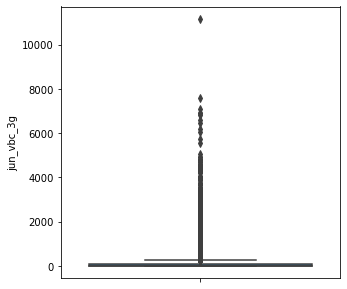

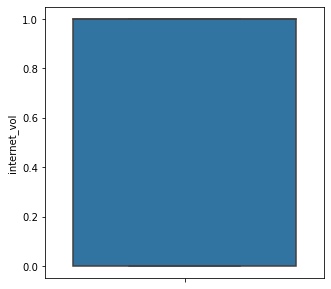

In [41]:
#BoxPlot for all the columns
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, data=df1)

- Insights: We can see clearly that outliers are present in some of the variables like offnet_mou_8, offnet_mou_6, arpu_8, arpu_7, arpu_6, loc_og_mou_6 etc.

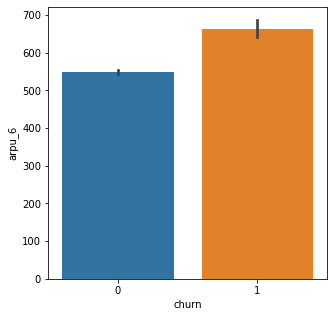

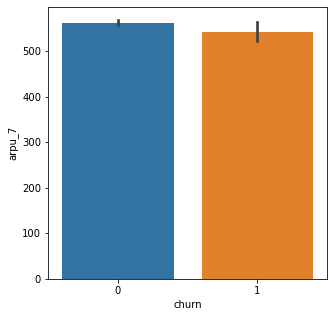

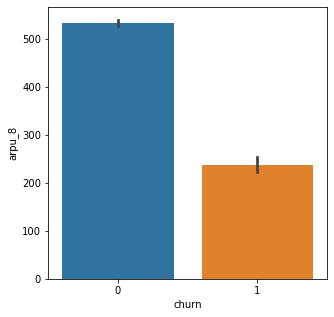

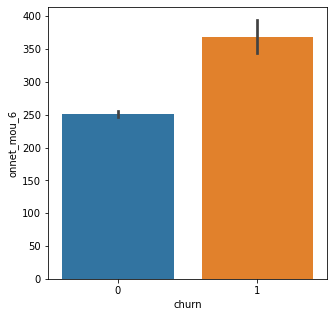

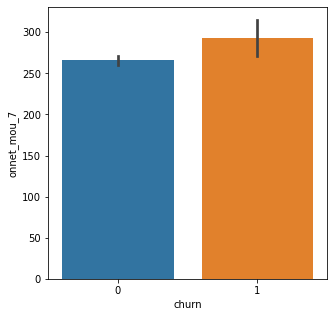

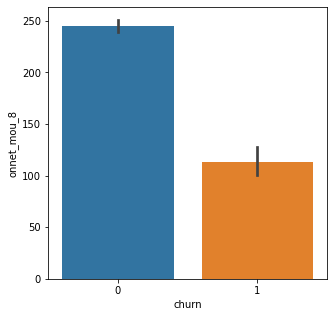

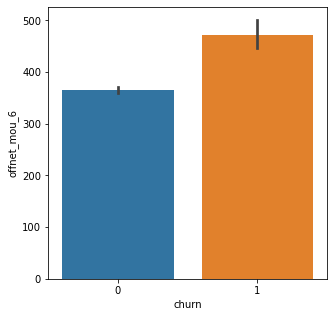

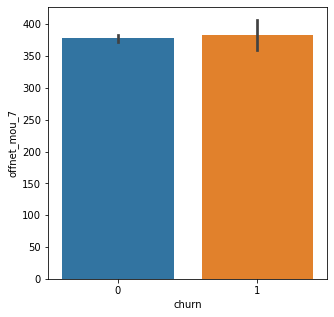

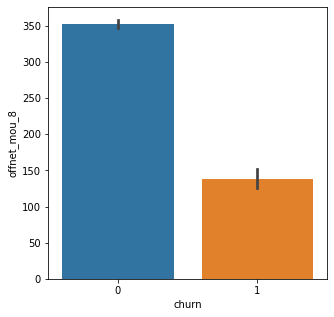

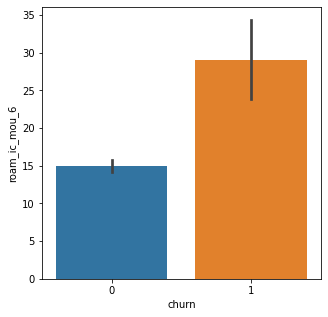

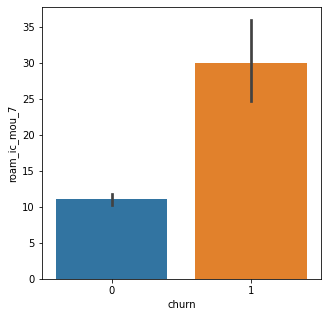

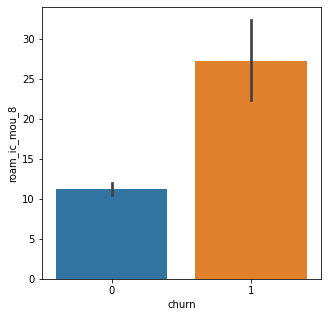

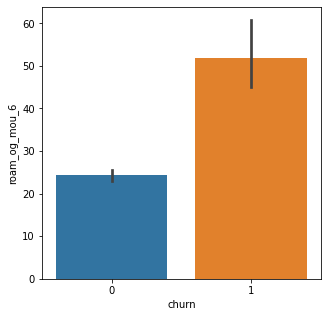

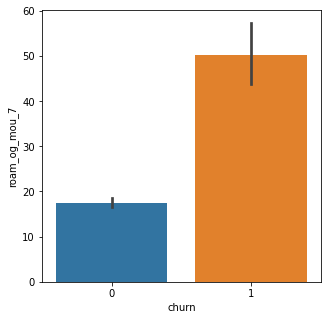

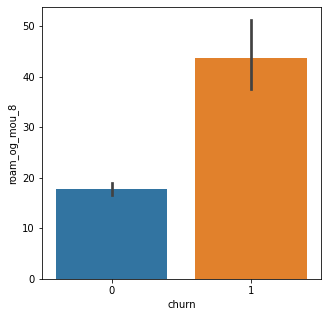

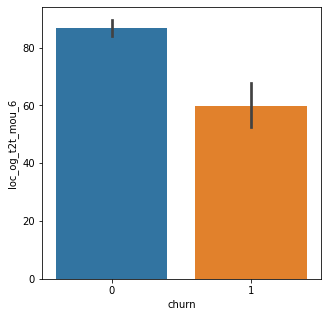

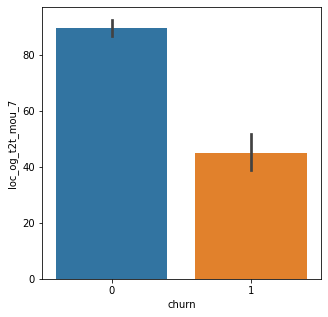

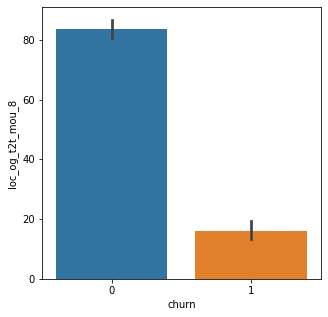

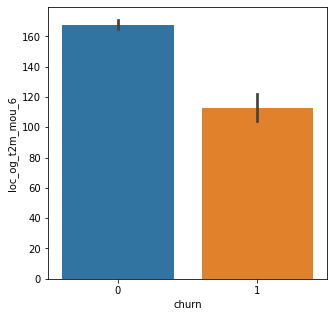

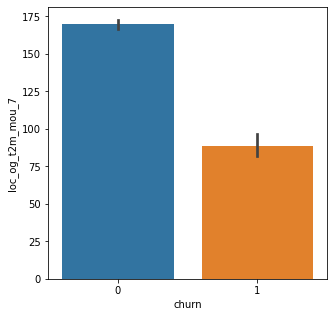

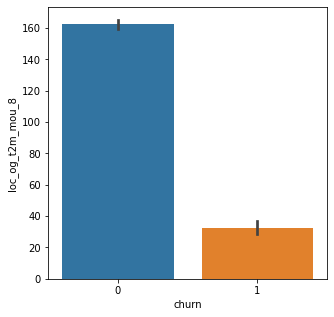

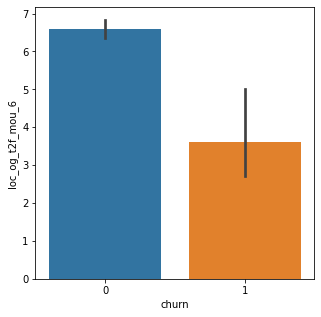

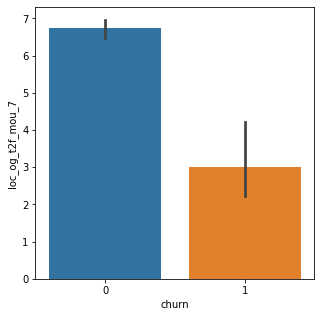

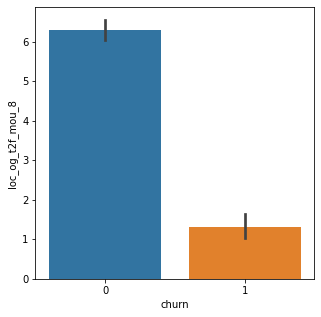

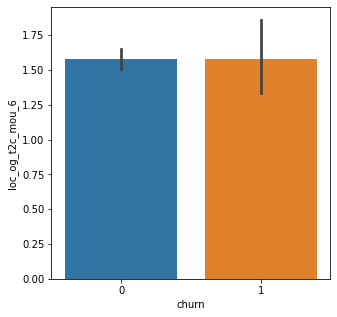

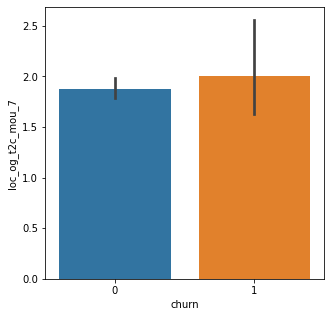

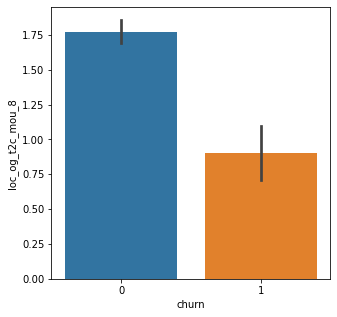

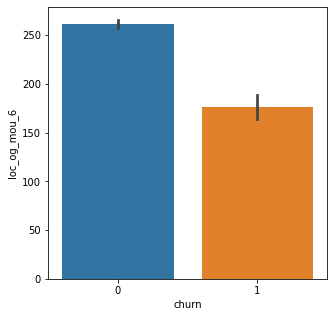

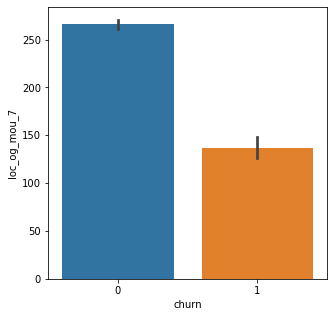

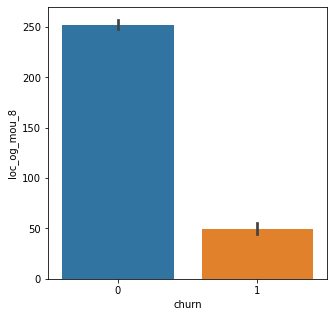

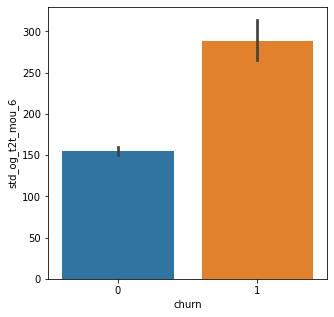

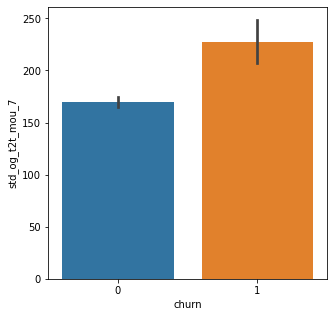

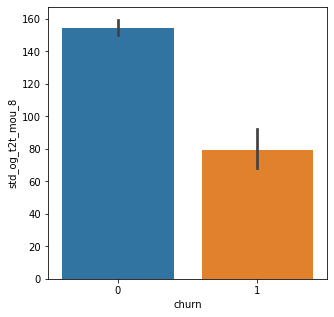

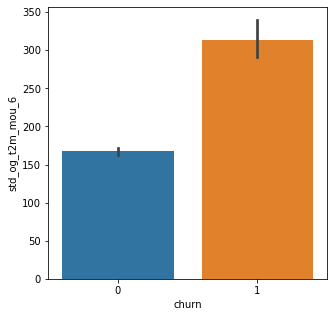

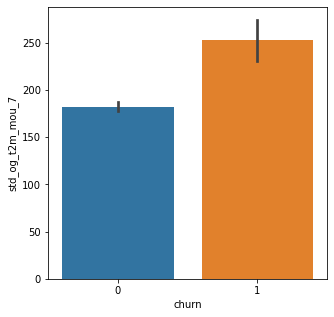

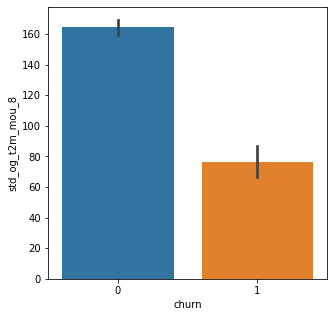

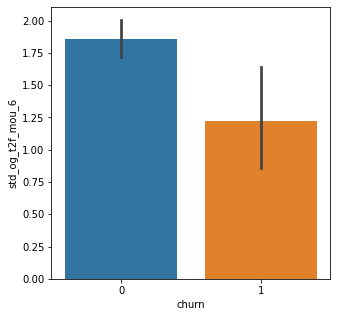

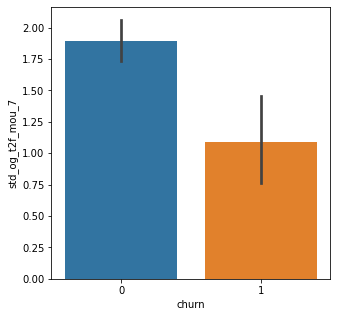

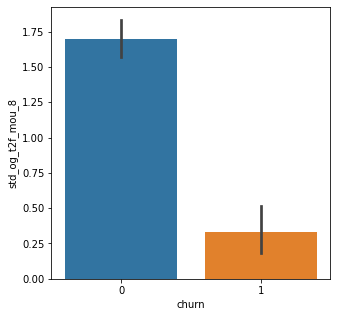

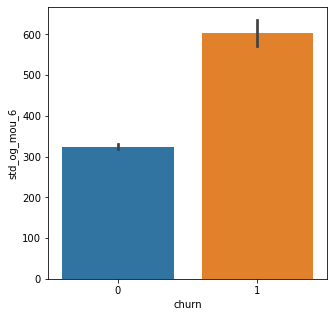

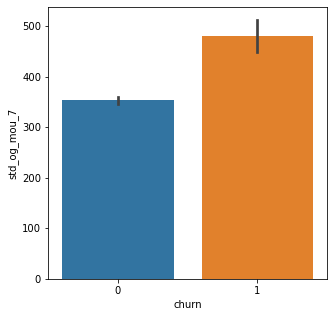

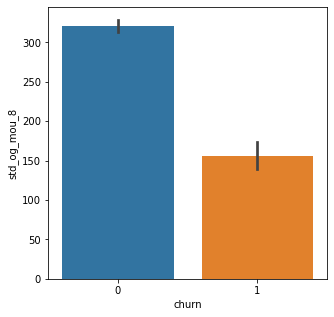

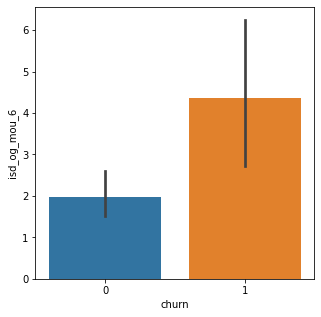

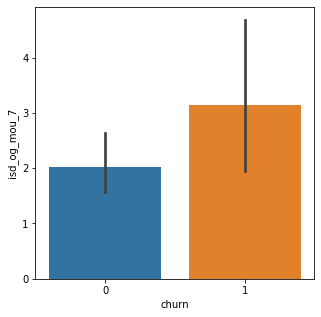

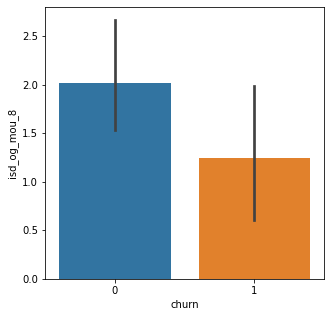

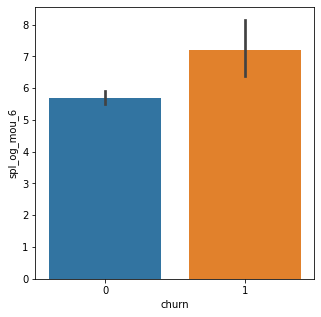

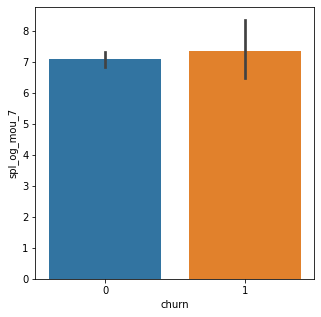

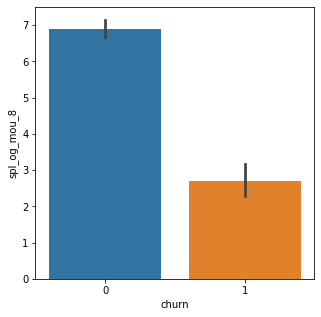

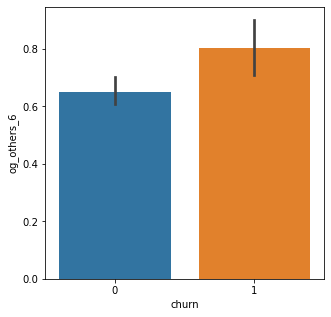

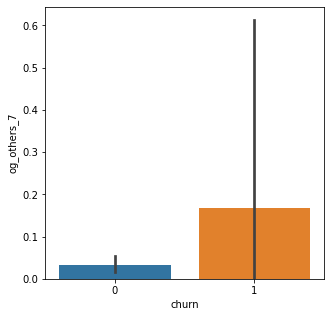

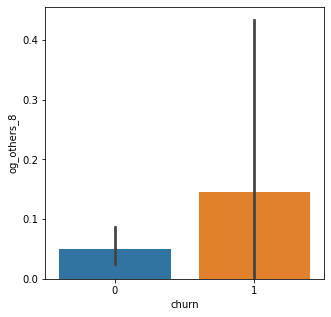

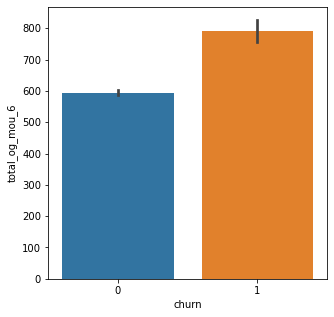

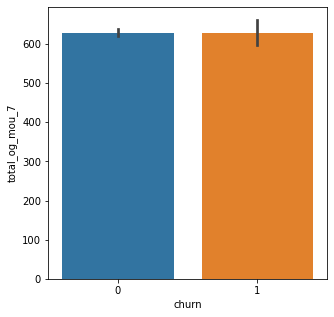

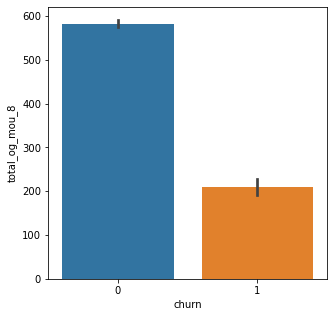

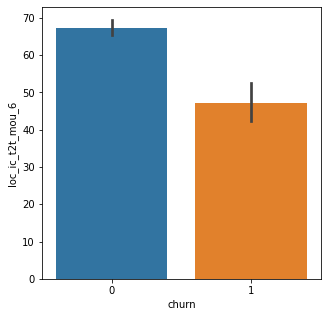

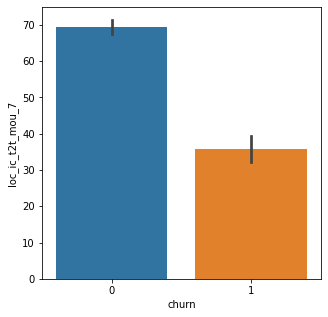

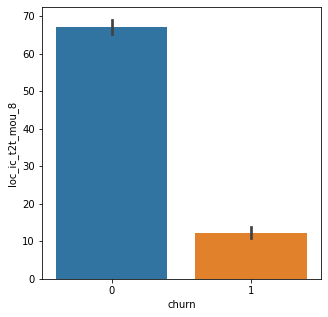

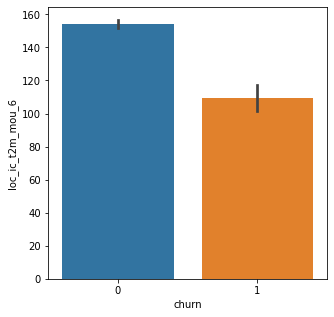

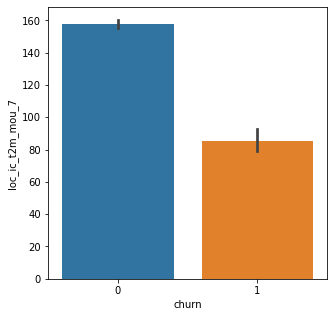

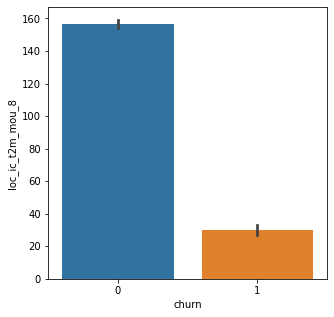

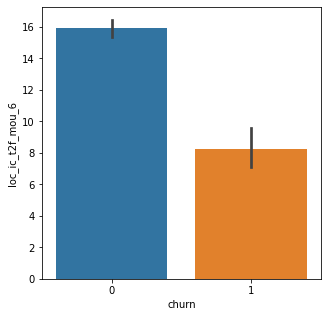

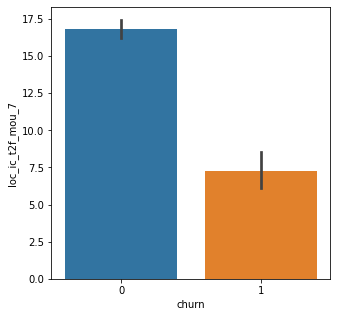

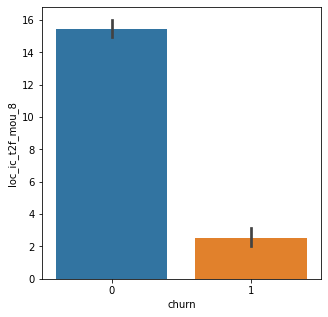

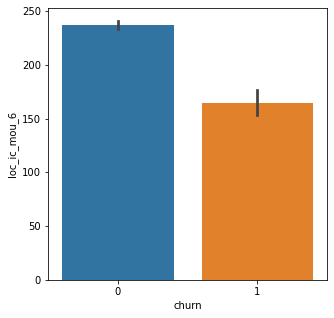

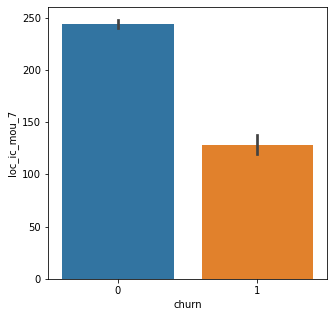

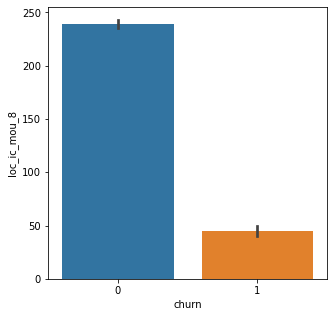

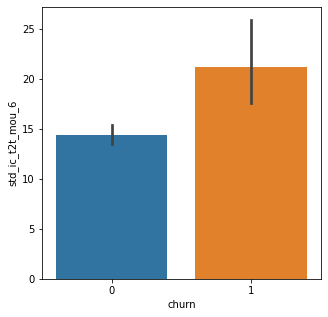

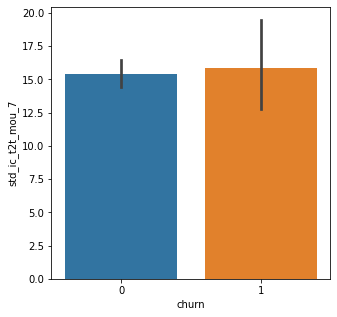

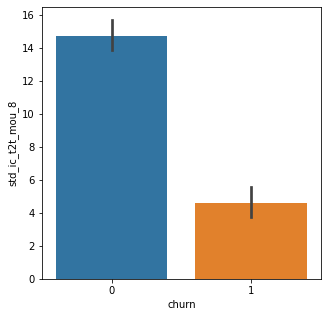

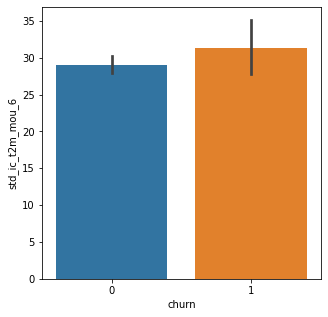

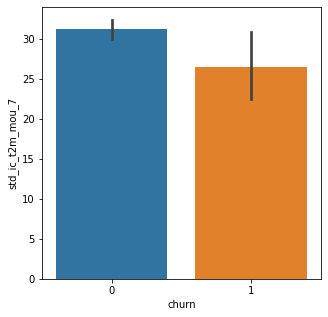

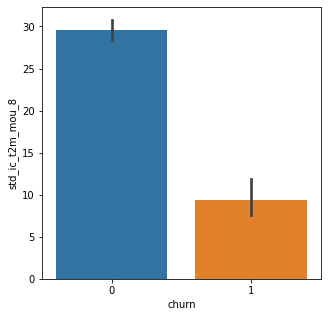

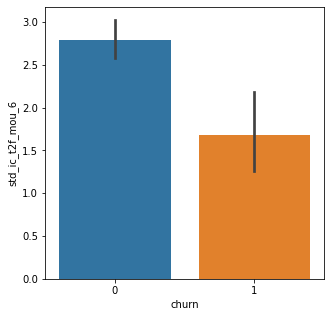

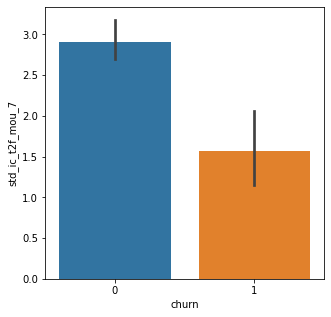

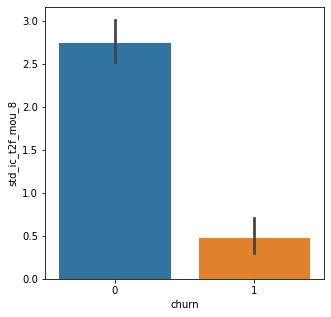

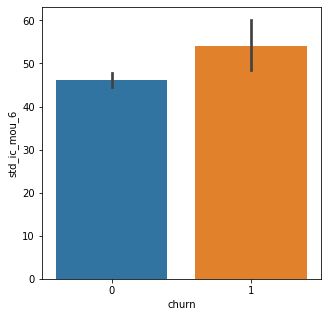

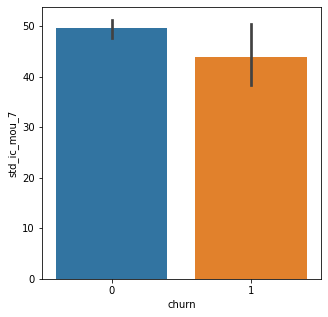

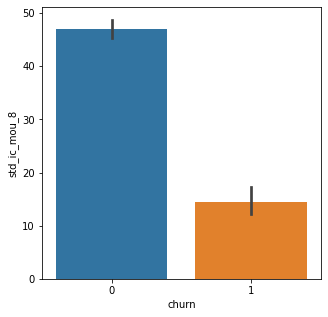

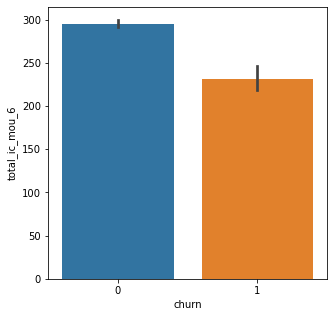

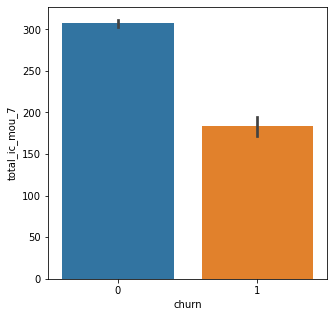

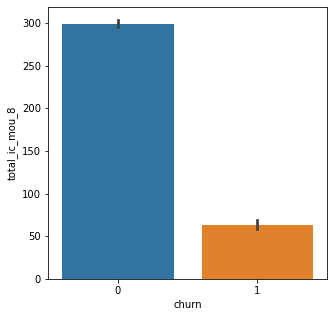

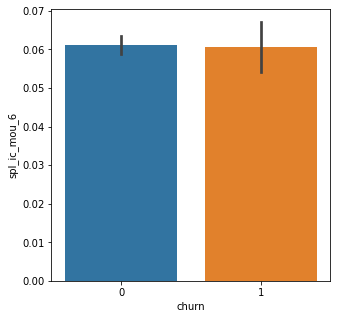

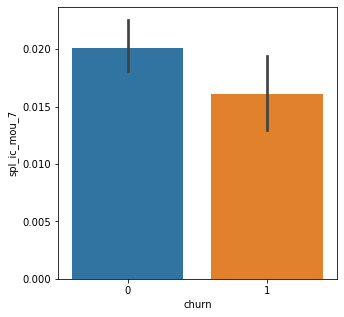

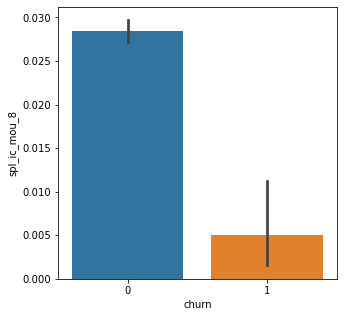

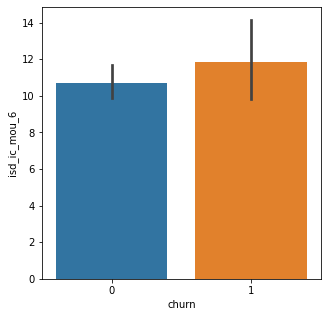

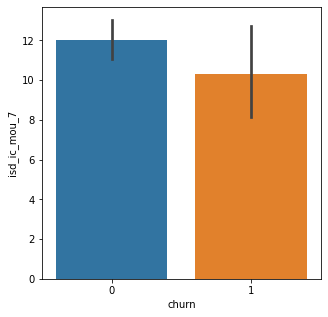

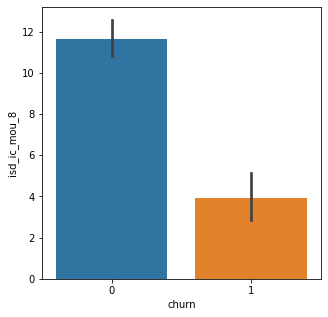

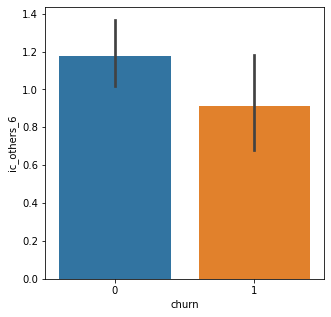

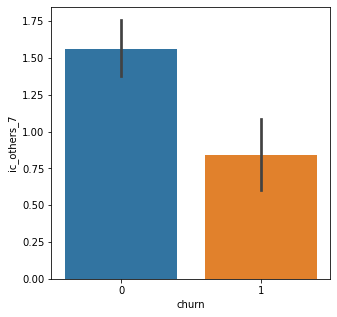

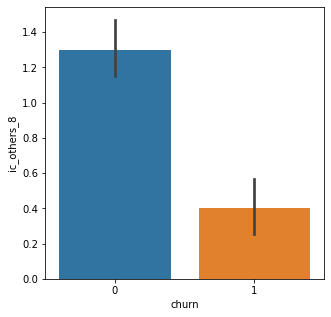

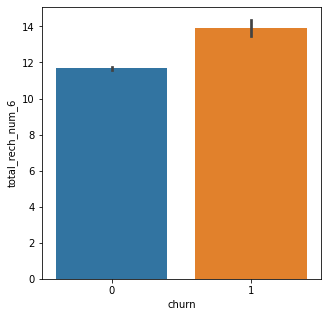

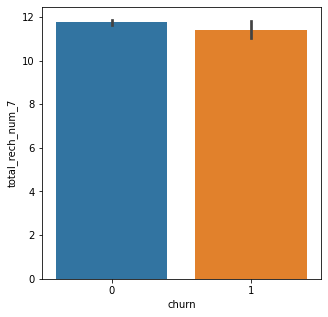

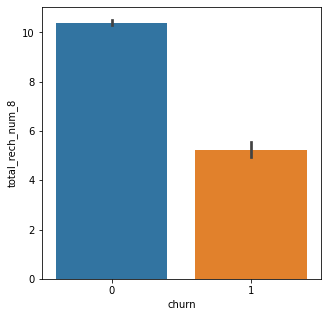

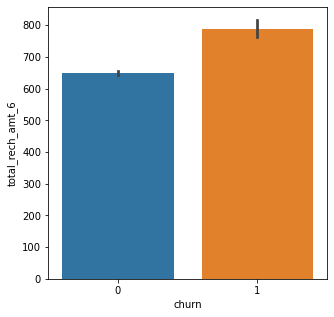

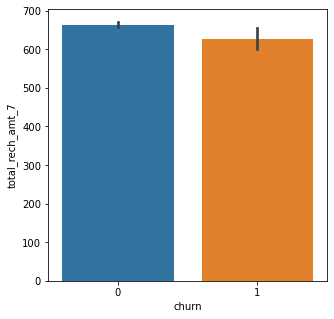

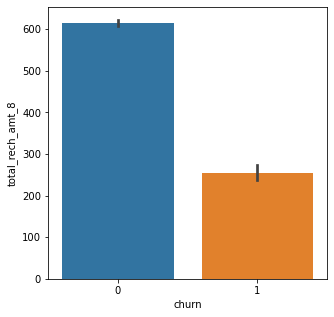

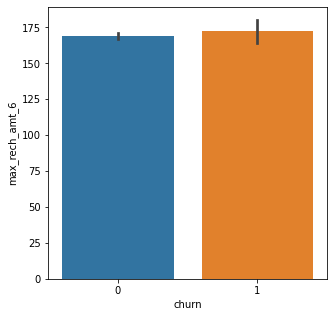

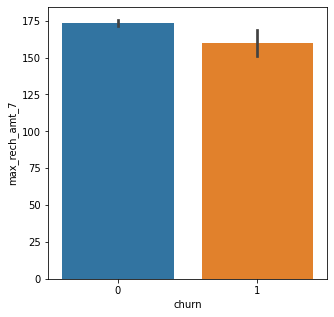

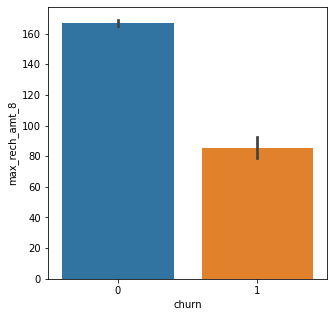

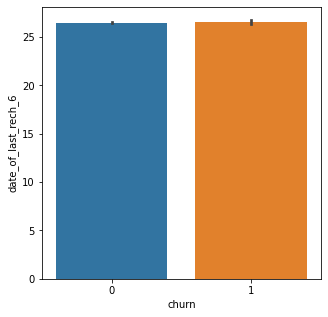

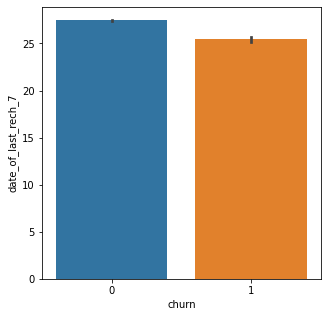

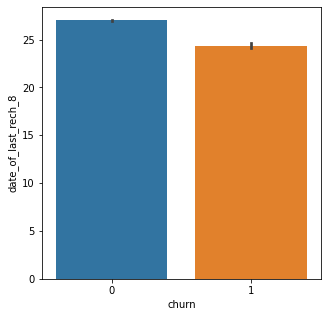

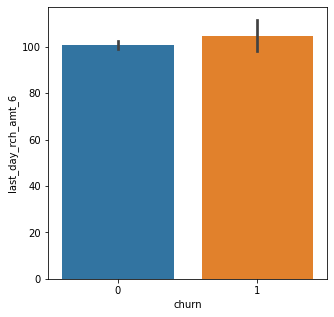

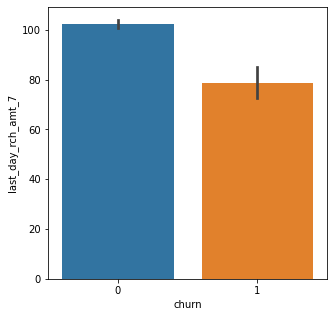

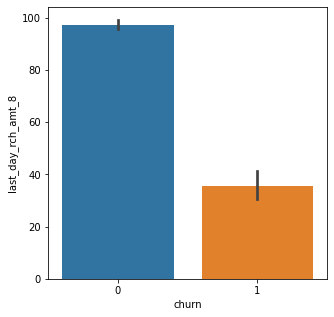

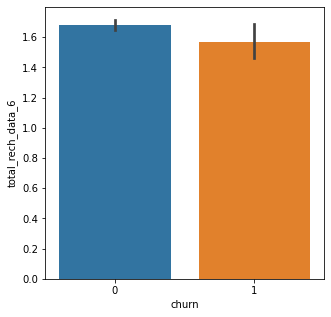

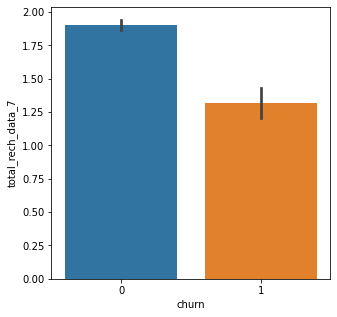

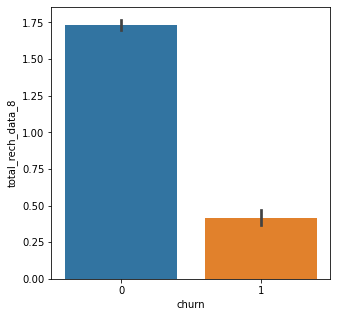

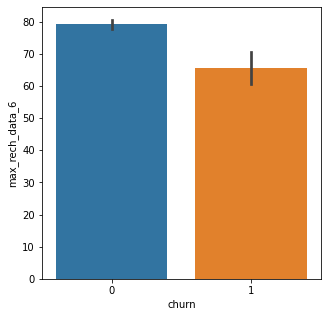

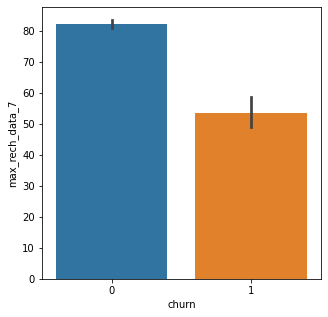

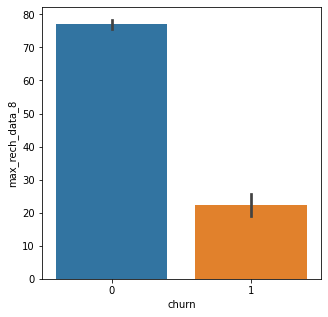

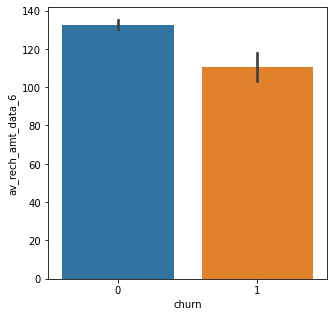

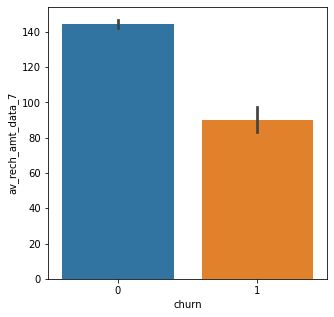

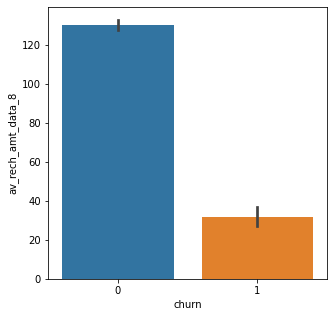

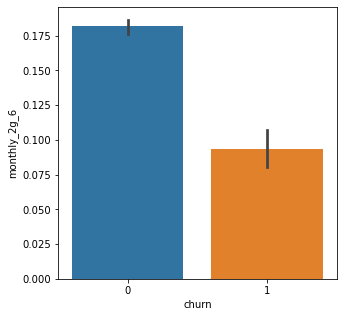

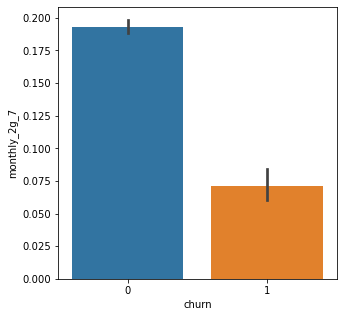

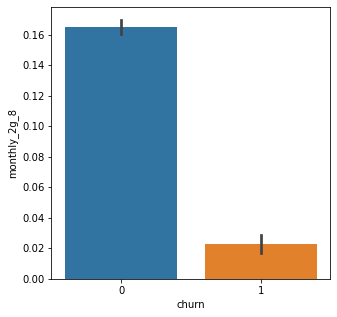

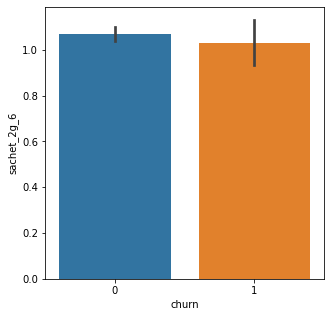

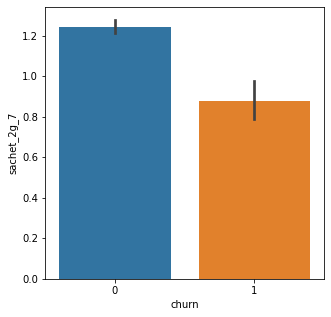

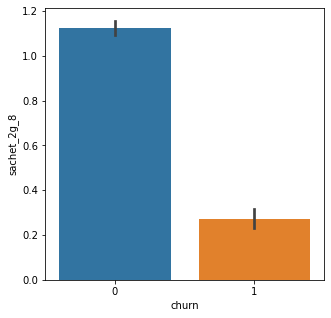

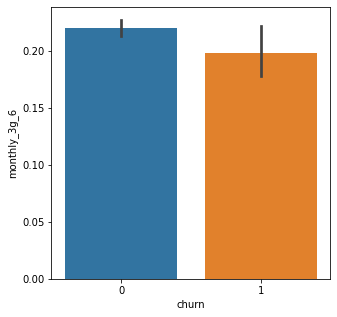

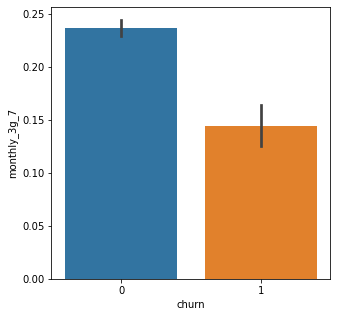

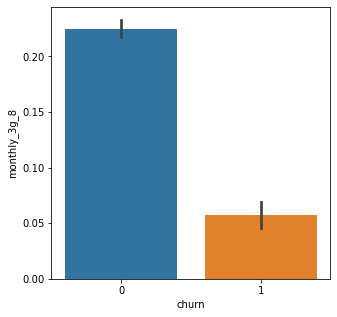

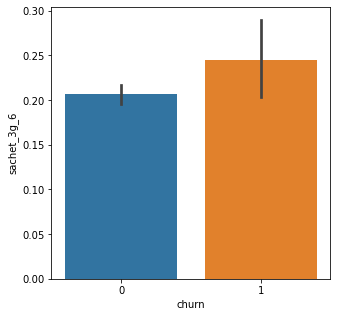

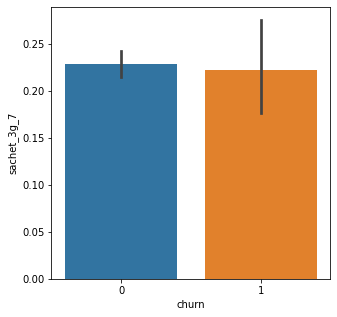

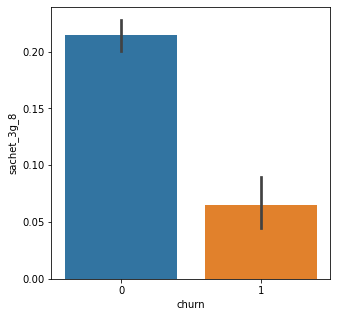

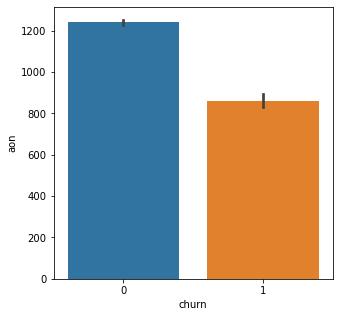

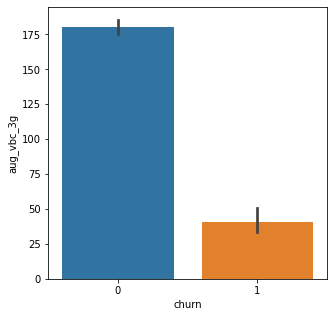

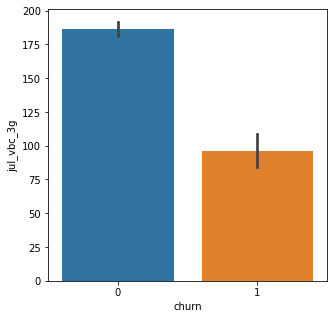

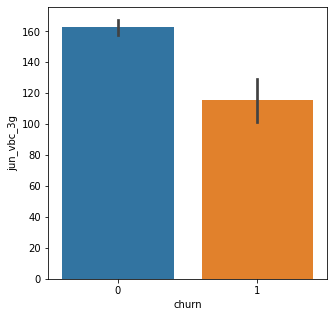

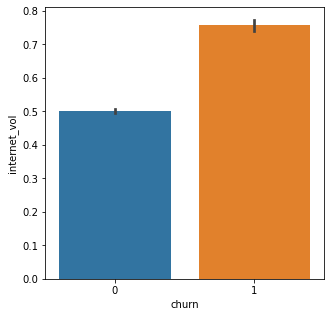

In [42]:
cont_cols = [col for col in df1.columns if col not in ['churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=df1)
    plt.show()


- Insights: Variables like arpu_6, onnet_mou_6, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_og_mou_7 and some others show more positive churn rates  
- Insights: Variables like offnet_mou_8, loc_og_t2t_mou_6, loc_og_t2t_mou_8 and few more have more number of non churn data

[Text(0, 0.5, '(%)')]

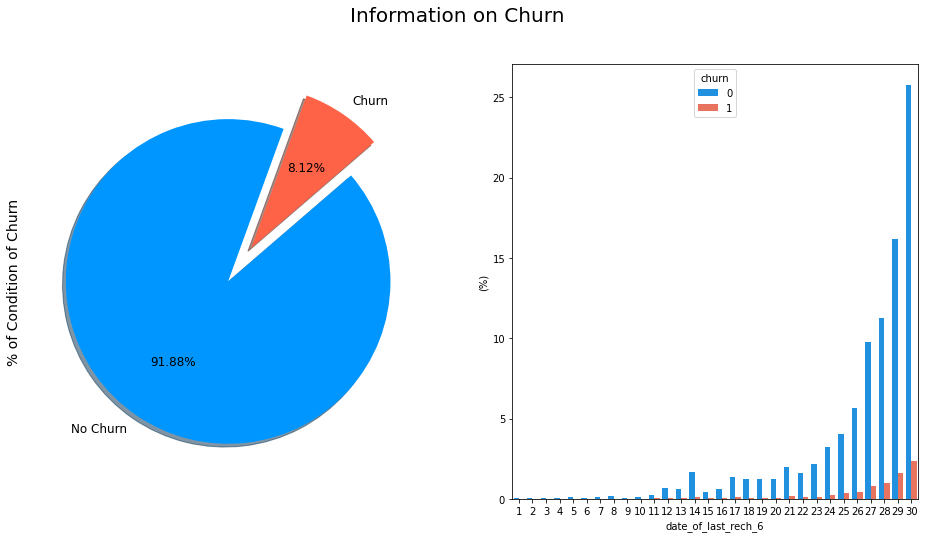

In [43]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#0096FF", "#FF6347"]

labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)

df1["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)

palette = ["#0096FF", "#FF6347"]
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=df1, palette=palette, estimator=lambda x: len(x) / len(df1) * 100)
ax[1].set(ylabel="(%)")

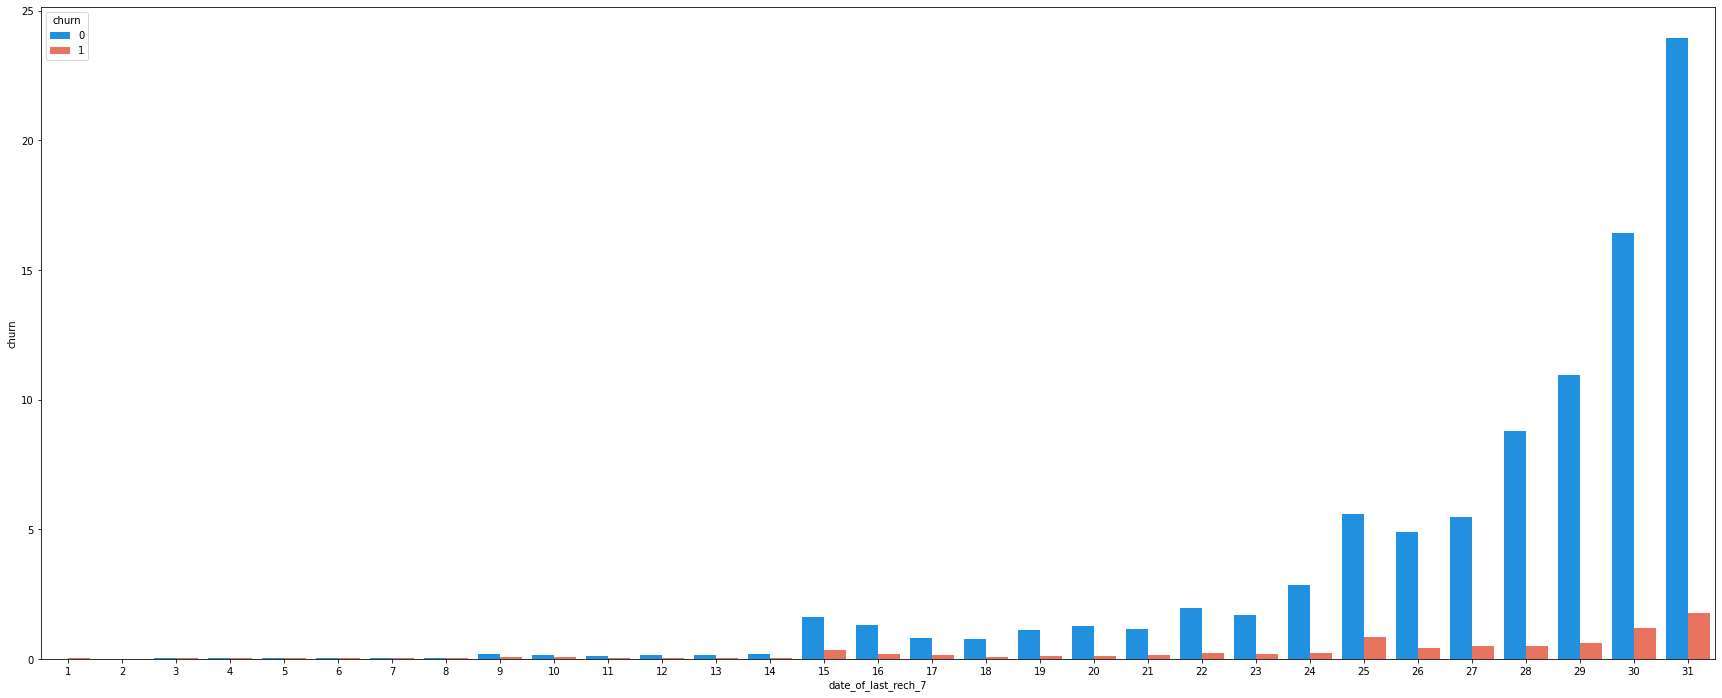

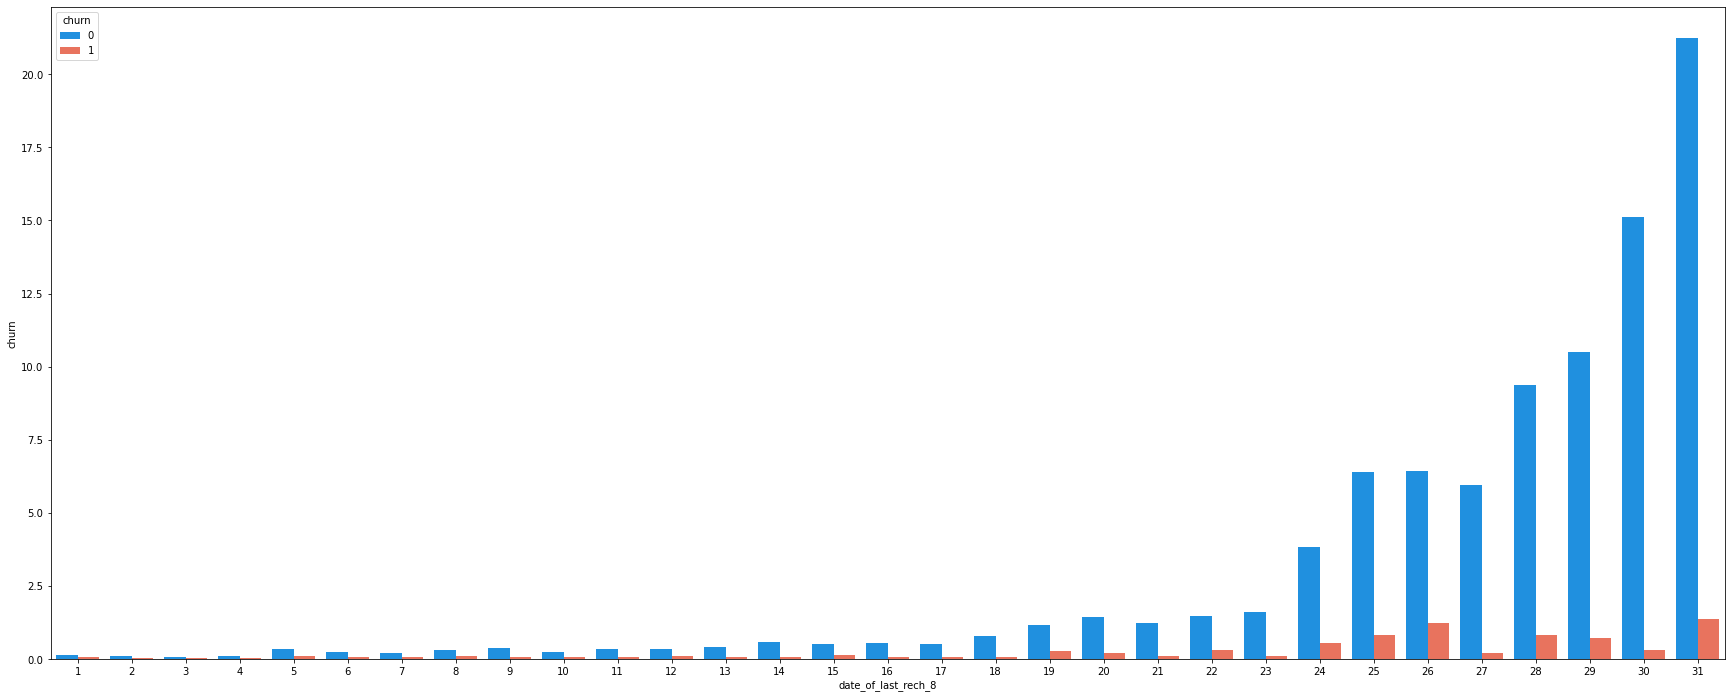

In [44]:
plt.figure(figsize=(30,12))
palette = ["#0096FF", "#FF6347"]
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=df1, palette=palette, 
            estimator=lambda x: len(x) / len(df1) * 100)
plt.show()

plt.figure(figsize=(30,12))
palette = ["#0096FF", "#FF6347"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=df1, palette=palette, 
            estimator=lambda x: len(x) / len(df1) * 100)
plt.show()

### Outliers Treatment

In [45]:
df1.describe(percentiles=[.25,.5,.75,.90,.95,.99,1])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,internet_vol
count,2.995300e+04,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,7.001206e+09,558.820058,561.160547,508.890301,260.900880,268.051744,234.345252,373.800402,378.233106,335.123008,16.124001,12.646145,12.512269,26.596033,20.155134,19.889295,84.574122,85.762835,78.153334,163.309546,163.087606,151.810056,6.348347,6.426493,5.891865,1.577380,1.888737,1.701889,254.240239

#### Removing outliers using K-sigma technique

In [46]:
# Function to Cap Outliers at 99 percentile
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

# Fetching all the numeric cols for outlier treatment
outliers_cols=df1.select_dtypes(include=['float64','int64']).columns.tolist()

df1[outliers_cols] = df1[outliers_cols].apply(cap_outliers, axis=0)

df1.describe(percentiles=[.25,.5,.75,.90,.95,.99,1])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,internet_vol
count,2.995300e+04,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,7.001206e+09,548.514161,551.188115,498.725003,244.617463,251.474623,216.847412,358.765330,362.186397,319.502304,12.335785,9.182920,9.227090,20.609724,14.993929,14.919463,73.510839,74.252178,68.057578,154.648786,155.239208,144.046150,5.470830,5.552123,5.066104,1.309164,1.589013,1.419649,241.209406,2

- Insights: Now we can see that there are no outliers because maximum values in each columns are capped near to 99 percentile values.
    

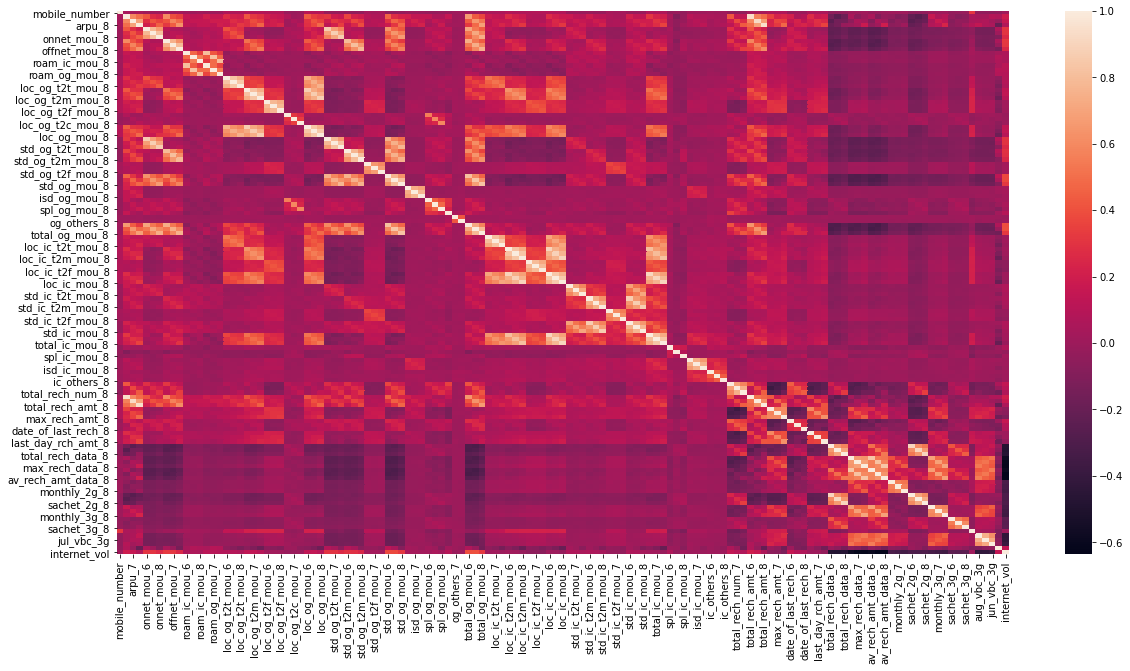

In [47]:
# checking correlation between numeric columns
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr())
plt.show()

In [48]:
# Create correlation matrix
corr_matrix = df1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# checking index of feature columns with correlation greater than 0.9
corr_columns = [column for column in upper.columns if any(upper[column] > 0.9)]
print('Corelated columns : \n {}'.format(corr_columns))

Corelated columns : 
 ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']


In [49]:
# Drop highly Correlated columns
df1.drop(corr_columns, axis = 1, inplace = True)

### Split Datasets in Train and Test and Scaling

In [50]:
y=df1['churn']
X=df1.drop(['churn','mobile_number'],axis=1)

In [51]:
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize ( ) to all columns 
X_norm = X.apply(normalize) 
X_norm.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,internet_vol
0,0.369292,0.379749,0.391614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000296,0.000000,0.000000,0.005219,0.000000,0.000000,0.007963,0.000000,0.000000,0.004735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099651,0.074946,0.052904,0.362270,0.351565,0.370523,0.486725,0.141278,0.000000,0.473338,0.481484,0.477106,0.098343,0.089792,0.094201,0.605097,0.595957,0.623181,0.344225,0.331278,0.355357,0.0,0.000000,0.0,0.485693,0.452881,0.484281,0.0,0.0,0.000000,0.201967,0.021219,0.000000,0.071788,0.0
1,0.684565,0.773834,1.000000,0.035258,0.031996,0.032466,0.248872,0.302380,0.182985,0.066203,0.139456,0.13461,0.063236,0.040803,0.113854,0.066614,0.038843,0.052946,0.337682,0.503728,0.190236,0.853821,0.762676,0.826031,0.0,0.0,0.000000,0.303738,0.386293,0.192830,0.003121,0.016187,0.008949,0.035462,0.021324,0.035495,0.176318,0.492163,0.484783,0.027999,0.032890,0.036462,0.0,0.001296,0.073497,0.076841,0.0,0.096412,0.0,0.0,0.0,0.181671,0.219039,0.131952,0.104367,0.056671,0.050598,0.269111,0.274524,0.153154,0.996806,0.619976,0.273713,0.363751,0.300282,0.163678,0.148662,0.044683,0.133241,0.282178,0.365034,0.418082,0.869209,0.557736,0.356485,0.392816,0.350534,0.420658,0.335776,0.0,0.0,0.008542,0.057517,0.141670,0.364804,0.306681,0.382262,0.124564,0.124911,0.185166,1.000000,1.000000,1.000000,0.828908,0.656511,0.749731,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.159421,0.040303,0.012832,0.013294,1.0
2,0.434870,0.476065,0.365799,0.252179,0.205405,0.021781,0.051956,0.042988,0.076628,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_norm,y,test_size=0.30,random_state=42)

In [53]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(20967, 122) (8986, 122)
(20967,) (8986,)


## Step :6 Model Building

### Principal Component Analysis
- From pie plot we have seen that there is a class imbalance in churn event rate,so we add class_weight = 'balanced'


In [54]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [55]:
#PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [56]:
print(pca.components_)
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

[[ 5.31204124e-02  5.55217810e-02  4.54955179e-02 ... -1.21033885e-01
  -1.13939877e-01  4.34665708e-01]
 [ 6.75015822e-02  6.77686277e-02  8.01392113e-02 ...  5.74847099e-02
   5.27058645e-02 -5.33124636e-02]
 [ 7.50275685e-02  9.99752201e-02  1.08023540e-01 ...  1.52925314e-01
   1.36617499e-01 -2.87888714e-01]
 ...
 [ 9.17320462e-03 -2.21459279e-02  1.47345703e-02 ...  5.72780488e-04
  -7.38235294e-04  3.76962906e-04]
 [-4.36740417e-03  1.75589049e-03  2.31089960e-03 ... -8.73402648e-04
  -2.74460870e-04 -2.72732762e-04]
 [ 1.12964296e-03 -3.65350345e-03  1.74069248e-04 ...  7.96124628e-04
  -6.58326097e-04  1.67651060e-04]]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Feature
0,0.053120,0.067502,0.075028,-0.019011,0.016723,-0.041087,-0.011095,0.121703,0.091750,0.047074,arpu_6
1,0.055522,0.067769,0.099975,-0.003840,0.020146,-0.030425,-0.001443,-0.050442,0.030311,-0.008256,arpu_7
2,0.045496,0.080139,0.108024,0.011499,0.017175,-0.023612,0.003776,-0.137782,0.005846,-0.018669,arpu_8
3,0.137637,0.000311,0.125405,0.010963,-0.291005,-0.006055,-0.000359,0.155624,0.124151,0.088452,onnet_mou_6
4,0.147745,-0.002386,0.157004,0.022474,-0.308405,0.006128,0.008457,-0.026594,0.047895,0.024758,onnet_mou_7
5,0.134951,0.013922,0.161930,0.036125,-0.272213,0.012074,0.010176,-0.138802,0.014603,-0.004304,onnet_mou_8
6,0.136867,0.093371,0.057819,-0.010568,0.260016,-0.017610,-0.121427,0.186138,0.082912,0.094062,offnet_mou_6
7,0.144007,0.093719,0.088992,0.000268,0.277889,-0.000133,-0.112816,-0.035119,-0.002035,0.010988,offnet_mou_7
8,0.126691,0.110264,0.102184,0.018895,0.237749,0.005128,-0.089286,-0.172575,-0.031879,-0.011285,offnet_mou_8
9,0.012892,0.005946,0.016295,-0.048158,0.023378,-0.000759,0.089533,-0.155696,0.200555,-0.095382,roam_ic_mou_6


- Plotting number of components vs cumulative explained variance to select how many components are explained

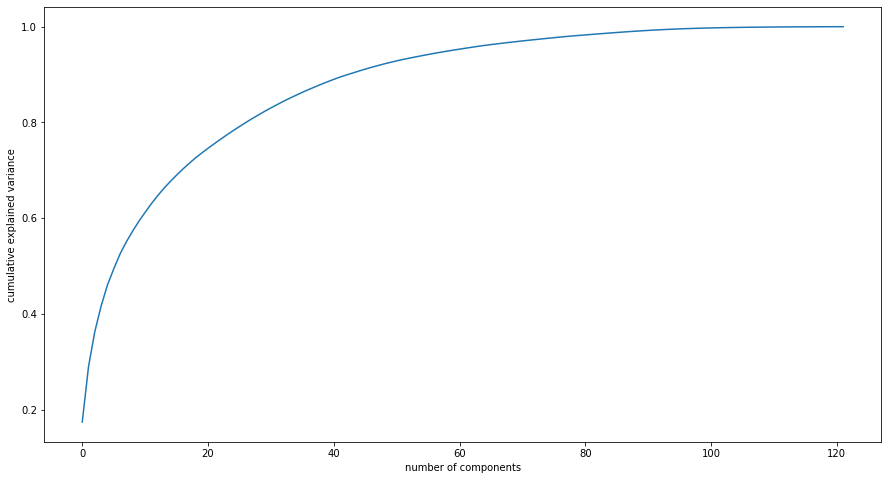

In [57]:
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- Insights: From above plot, 40 component explain 90% of variance in the data

In [58]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20967, 40)

### Correlation matrix

In [59]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

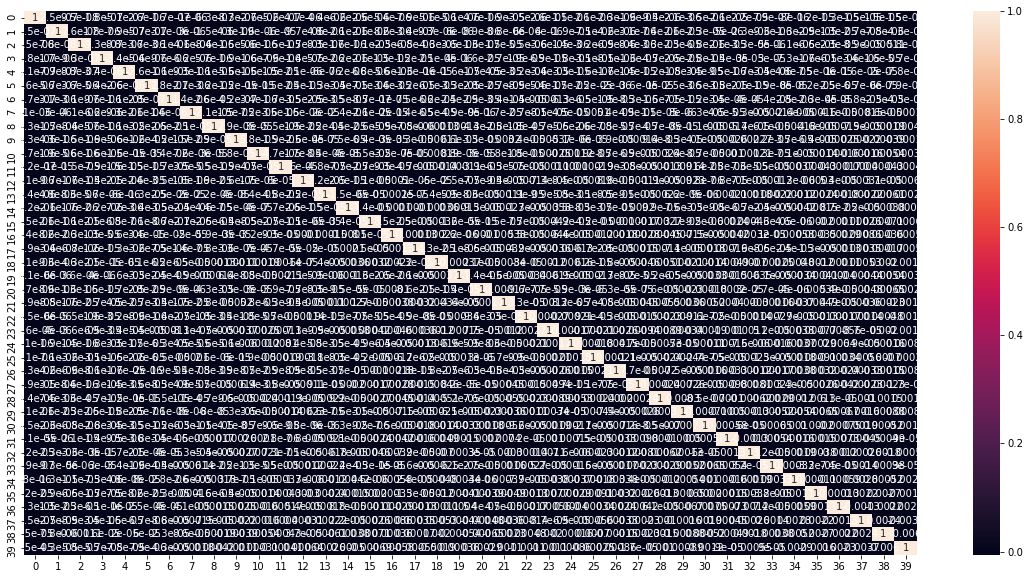

In [60]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [61]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.002789320630492296 , min corr:  -0.0059899387968799555


we see that correlations are indeed very close to 0

In [62]:
#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8986, 40)

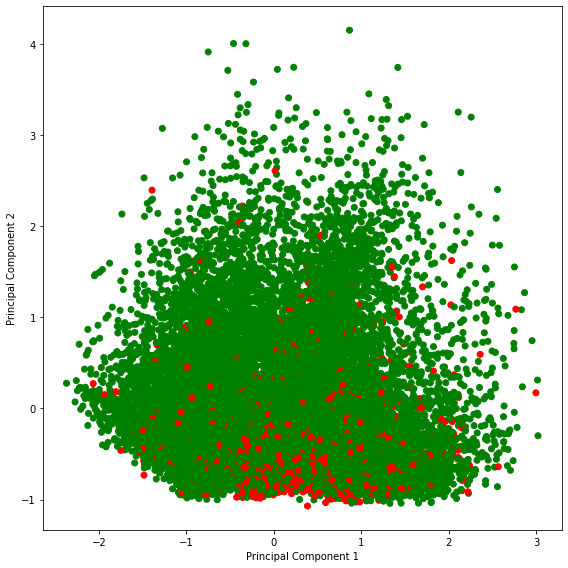

In [63]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### Logistic Regression  with PCA
- We select only 40 pca feature for modelling and use class imbalance with class_width = balanced

In [64]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

In [65]:
# prediction on the test data 
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.9'

In [66]:
# prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [67]:
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(round(accuracy_score(y_test,y_pred_default),3))

[[6808 1440]
 [ 126  612]]
0.826


In [68]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})


In [69]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC AUC score: ',round(roc_auc,3))

ROC AUC score:  0.9


#### ROC Curve

In [70]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

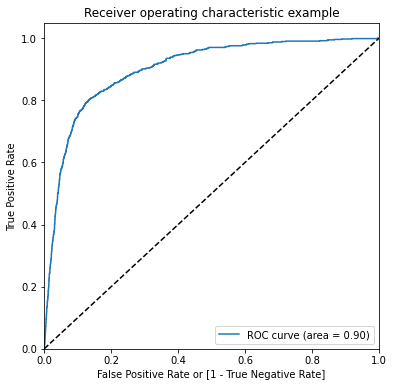

(array([0.00000000e+00, 0.00000000e+00, 1.21241513e-04, ...,
        9.99757517e-01, 9.99878758e-01, 1.00000000e+00]),
 array([0.        , 0.00135501, 0.00135501, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99744731e+00, 9.97447310e-01, 9.94913069e-01, ...,
        8.82384872e-05, 7.26265559e-05, 6.84584128e-05]))

In [71]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [72]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.520731,1,1,1,1,1,1,0,0,0,0
1,0,0.001708,1,0,0,0,0,0,0,0,0,0
2,0,0.416769,1,1,1,1,1,0,0,0,0,0
3,0,0.389523,1,1,1,1,0,0,0,0,0,0
4,0,0.109858,1,1,0,0,0,0,0,0,0,0


- Calculating accuracy sensitivity and specificity for various probability cutoffs.

In [73]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.082128  0.000000  1.000000
0.1   0.1  0.399844  0.347599  0.983740
0.2   0.2  0.564434  0.528855  0.962060
0.3   0.3  0.680503  0.659069  0.920054
0.4   0.4  0.761852  0.751455  0.878049
0.5   0.5  0.825729  0.825412  0.829268
0.6   0.6  0.871244  0.878758  0.787263
0.7   0.7  0.899844  0.917435  0.703252
0.8   0.8  0.919764  0.951382  0.566396
0.9   0.9  0.923103  0.981208  0.273713


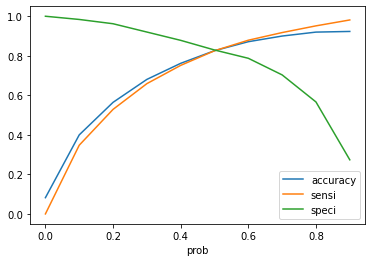

In [74]:
#  plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [75]:
## optimal cutoff
import sys
def Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.5068261725433373]


- Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0

In [76]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

0    8248
1     738
Name: churn, dtype: int64

### Confusion matrix 

In [77]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6759, 1489],
       [ 122,  616]], dtype=int64)

#### Model Evaluation for logistic regression with PCA

In [78]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score: ', round(accuracy_score(y_test,y_pred_default),3))

# sensitivity of our logistic regression model
print('Sensitivity: ', round(TP / float(TP+FN),3))

# specificity
print('Specificity: ',round(TN / float(TN+FP),3))

# false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),3))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),3))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),3))

## Misclassification rate
print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),3))

Accuracy Score:  0.826
Sensitivity:  0.835
Specificity:  0.819
false postive rate:  0.181
positive predictive value:  0.293
Negative predictive value:  0.982
Misclassification Rate:  0.179


## Logistc Regression  with RFE
- We are going to select 10 feature from RFE

In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 40 variables as output as PCA gave 40
rfe = rfe.fit(X_norm,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True  True False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False  True
 False False False False  True False False False False False False False
 False False False False False False False False  True False False False
 False False False False False  True False False False False False False
 False False  True False False False False False  True False False False
 False False False False False False False False False False False False
 False False]
[  1   1  17  36  15  10  39  23  22 100  44  67 101 102   6  99  59  14
  98  24   1  57  26  56  82  86  60  34  58  19  78  16  68  77  25  13
  76 104  28  79 107  20  53  83  52 113  87  48  80  32   8  38  37  35
  33 112   1  18  66   1  90  55   2 

In [80]:
col = X_train.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_7', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_8'],
      dtype='object')

In [81]:
import statsmodels.api as sm

# vif function
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

#### Correlation matrix

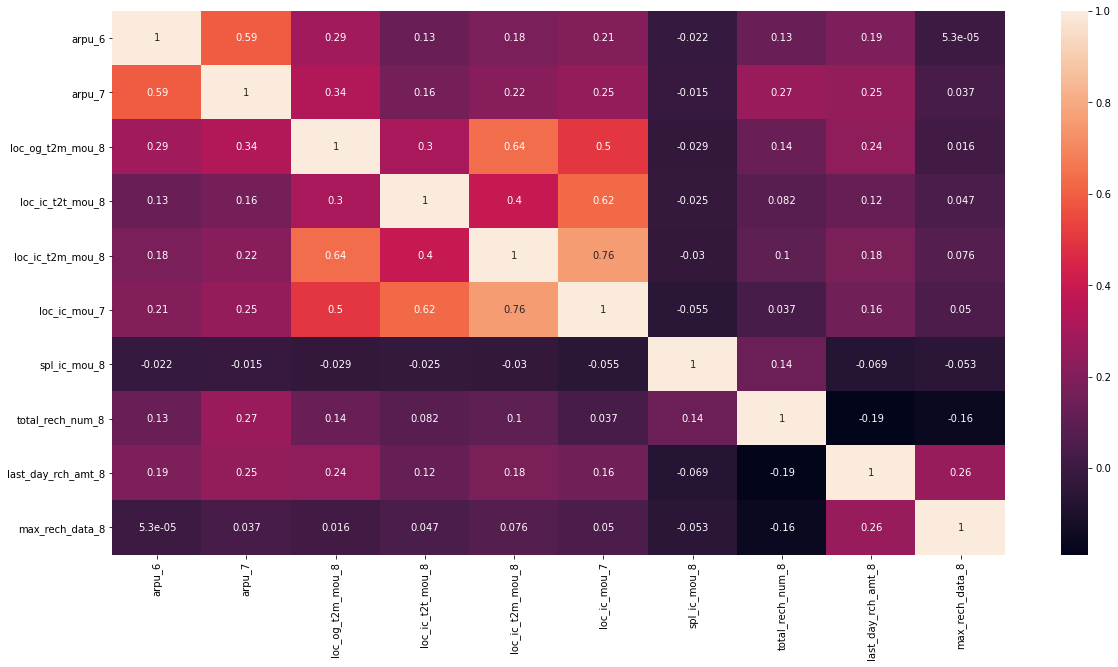

In [82]:
# correlation matrix 
plt.figure(figsize = (20,10))        
sns.heatmap(X_norm[col].corr(),annot = True)
plt.show()

#### VIF 

In [83]:
col_for_vif = list(col)
col_for_vif.append('churn')
vif_cal(input_data=df1[col_for_vif], dependent_col='churn')

,Var,Vif
5,loc_ic_mou_7,6.19
1,arpu_7,5.90
4,loc_ic_t2m_mou_8,5.33
0,arpu_6,4.71
2,loc_og_t2m_mou_8,2.92
7,total_rech_num_8,2.48
3,loc_ic_t2t_mou_8,2.36
8,last_day_rch_amt_8,2.06
9,max_rech_data_8,1.54
6,spl_ic_mou_8,1.09


- VIF looks good now will select these coloum for creating LogisticRegression

In [84]:
# run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col], y_train)

LogisticRegression(class_weight='balanced')

#### ROC_AUC score

In [85]:
#Making prediction on the test data
pred_probs_test = logsk.predict_proba(X_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [86]:
#prediction on the test data
pred_test = logsk.predict_proba(X_test[col])
y_pred_default = logsk.predict(X_test[col])

In [87]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',round(accuracy_score(y_test,y_pred_default),3))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8248
           1       0.27      0.83      0.41       738

    accuracy                           0.80      8986
   macro avg       0.62      0.81      0.64      8986
weighted avg       0.92      0.80      0.84      8986

[[6582 1666]
 [ 126  612]]
accuracy_score :  0.801


In [88]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})


In [89]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC AUC Score: ',round(roc_auc,3))

ROC AUC Score:  0.89


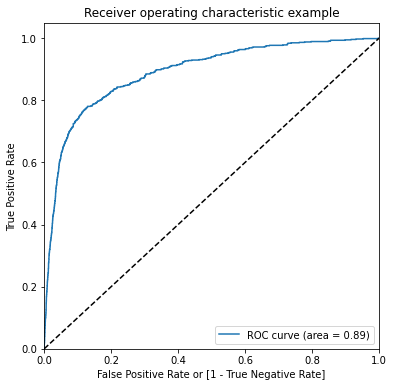

(array([0.        , 0.        , 0.        , ..., 0.99975752, 0.99987876,
        1.        ]),
 array([0.        , 0.00135501, 0.00271003, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99155277e+00, 9.91552766e-01, 9.90639388e-01, ...,
        4.50764473e-05, 1.19478142e-05, 8.88799868e-06]))

In [90]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [91]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()


,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.470892,1,1,1,1,1,0,0,0,0,0
1,0,0.001475,1,0,0,0,0,0,0,0,0,0
2,0,0.570280,1,1,1,1,1,1,0,0,0,0
3,0,0.485951,1,1,1,1,1,0,0,0,0,0
4,0,0.067626,1,0,0,0,0,0,0,0,0,0


In [92]:
#  Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.082128  0.000000  1.000000
0.1   0.1  0.364122  0.309287  0.976965
0.2   0.2  0.513799  0.475145  0.945799
0.3   0.3  0.630091  0.604753  0.913279
0.4   0.4  0.718006  0.704292  0.871274
0.5   0.5  0.800579  0.798012  0.829268
0.6   0.6  0.863232  0.870635  0.780488
0.7   0.7  0.906521  0.925073  0.699187
0.8   0.8  0.927665  0.965082  0.509485
0.9   0.9  0.925106  0.993332  0.162602


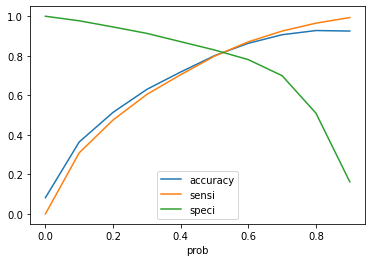

In [93]:
#  plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [94]:
## optimal cutoff
def Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.5185351496552241]


In [95]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()


0    8248
1     738
Name: churn, dtype: int64

In [96]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6519, 1729],
       [ 121,  617]], dtype=int64)

#### Model Evaluation for logistic regression with RFE

In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score : ',round(accuracy_score(y_test,y_pred_default),3))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', round(TP / float(TP+FN),3))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),3))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),3))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),3))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),3))

Accuracy Score :  0.801
Sensitivity:  0.836
Specificity:  0.79
false postive rate:  0.21
positive predictive value:  0.263
Negative predictive value:  0.982


- From above Logistic Regression give good Accuracy with PCA and with RFE

#### Model Evaluation for logistic regression with PCA
- Accuracy Score on test data:  0.826
- Sensitivity:                  0.835
- Specificity:                  0.819
- false postive rate:           0.181
- positive predictive value:    0.293
- Negative predictive value:    0.982
- Misclassification Rate:       0.179

#### Model Evaluation for logistic regression with RFE
- Accuracy Score :              0.801
- Sensitivity:                  0.836
- Specificity:                  0.79
- false postive rate:           0.21
- positive predictive value:    0.263
- Negative predictive value:    0.982


### Decision Tree

In [98]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

In [99]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [100]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8248
           1       0.73      0.51      0.60       738

    accuracy                           0.94      8986
   macro avg       0.84      0.74      0.78      8986
weighted avg       0.94      0.94      0.94      8986



In [101]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(round(accuracy_score(y_test,y_pred_default),3))

[[8110  138]
 [ 365  373]]
0.944


#### Tune Max Depth

In [102]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 10)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100,)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,n_jobs=-1)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(1, 10)},
             return_train_score=True, scoring='accuracy')

In [103]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.446360,0.017082,0.027198,0.012997,1,{'max_depth': 1},0.928231,0.934907,0.930122,0.927975,0.923682,0.928983,0.003635,9,0.929172,0.927503,0.928699,0.929236,0.930309,0.928984,0.000909
1,0.910586,0.061381,0.017598,0.003202,2,{'max_depth': 2},0.941345,0.944206,0.943716,0.940138,0.939900,0.941861,0.001790,2,0.942586,0.941871,0.941994,0.941934,0.942947,0.942266,0.000426
2,1.277050,0.055501,0.017599,0.015510,3,{'max_depth': 3},0.940153,0.943729,0.943716,0.940138,0.939900,0.941527,0.001795,3,0.942646,0.943600,0.941994,0.942053,0.942947,0.942648,0.000596
3,1.817469,0.147500,0.028794,0.018659,4,{'max_depth': 4},0.941345,0.943729,0.943239,0.940615,0.941092,0.942004,0.001241,1,0.943659,0.943719,0.943305,0.943782,0.944378,0.943769,0.000347
4,2.354094,0.200723,0.017524,0.011767,5,{'max_depth': 5},0.938960,0.940153,0.943954,0.939184,0.939661,0.940383,0.001832,4,0.945090,0.946104,0.944915,0.946226,0.945869,0.945641,0.000537


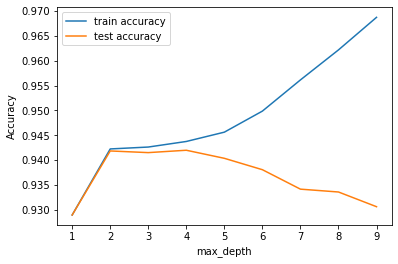

In [104]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="train accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- Insights: From above we can describe that as increase the value of max_depth, both train and test score increase till about max-depth 2, after test will become constant till max depth 4 and then after max- depth 4 test score gradually reduces. Here scores are average accuracies across the 5-folds. 

#### Tune Minimum samples leaf

In [105]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(150, 250, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,n_jobs=-1)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(150, 250, 20)},
             return_train_score=True, scoring='accuracy')

In [106]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.415341,0.565875,0.009449,0.005827,150,{'min_samples_leaf': 150},0.941106,0.939914,0.942285,0.940138,0.9399,0.940669,0.000921,5,0.942706,0.942586,0.942411,0.941934,0.942947,0.942517,0.000340
1,2.345164,0.252830,0.011049,0.009526,170,{'min_samples_leaf': 170},0.941106,0.940629,0.942285,0.940138,0.9399,0.940812,0.000846,4,0.942706,0.942586,0.942411,0.941934,0.942947,0.942517,0.000340
2,2.156463,0.153478,0.022250,0.007960,190,{'min_samples_leaf': 190},0.941345,0.944206,0.943716,0.940138,0.9399,0.941861,0.001790,1,0.942586,0.941871,0.941994,0.941934,0.942947,0.942266,0.000426
3,3.005487,0.343994,0.012792,0.003920,210,{'min_samples_leaf': 210},0.941345,0.944206,0.943716,0.940138,0.9399,0.941861,0.001790,1,0.942586,0.941871,0.941994,0.941934,0.942947,0.942266,0.000426
4,3.159840,0.217086,0.025595,0.009334,230,{'min_samples_leaf': 230},0.941345,0.944206,0.943716,0.940138,0.9399,0.941861,0.001790,1,0.942586,0.941871,0.941994,0.941934,0.942947,0.942266,0.000426


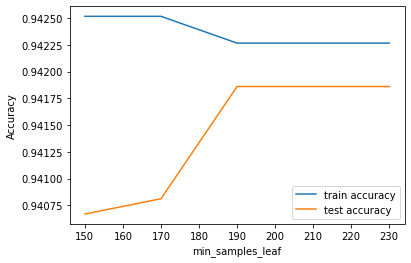

In [107]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="train accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- Insights: From above we can describe that min_sample_leaf will become constant after 190  and hence the model starts becoming more stable

#### Tune min_samples_split

In [108]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(150, 250, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,n_jobs=-1)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(150, 250, 20)},
             return_train_score=True, scoring='accuracy')

In [109]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.912016,1.321748,0.015700,0.000150,150,{'min_samples_split': 150},0.936338,0.934192,0.940615,0.937515,0.936561,0.937044,0.002090,5,0.949323,0.950039,0.949088,0.949565,0.948015,0.949206,0.000674
1,3.318882,0.270927,0.014399,0.005985,170,{'min_samples_split': 170},0.937291,0.935384,0.939900,0.937276,0.937038,0.937378,0.001447,4,0.948310,0.948787,0.948015,0.948671,0.947776,0.948312,0.000382
2,4.967543,0.832433,0.020800,0.014836,190,{'min_samples_split': 190},0.937291,0.935384,0.939900,0.938707,0.937038,0.937664,0.001537,3,0.946939,0.948787,0.947180,0.947419,0.947597,0.947584,0.000641
3,5.540427,0.451040,0.024002,0.008760,210,{'min_samples_split': 210},0.938960,0.935622,0.941092,0.937276,0.937038,0.937998,0.001875,2,0.946700,0.947237,0.946524,0.945809,0.947597,0.946774,0.000615
4,4.740121,0.836048,0.017525,0.009343,230,{'min_samples_split': 230},0.938960,0.938007,0.941092,0.937515,0.937038,0.938522,0.001434,1,0.946640,0.946342,0.946524,0.945571,0.947597,0.946535,0.000649


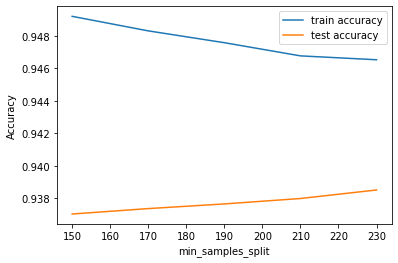

In [110]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="train accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- Insights: From above we can describe that after min_samples_split 210 for both train and test accuracy start to converge, hence making the model more stable and less complex

Running the model with grid search to find the optimal hyper parameters

In [111]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(4, 10, 5),
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(150, 250, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   39.4s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(4, 10, 5),
                         'min_samples_leaf': range(150, 250, 50),
                         'min_samples_split': range(150, 250, 50)},
             verbose=1)

In [112]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.955417,1.200554,0.019124,0.010874,entropy,4,150,150,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.941106,0.944206,0.942285,0.940138,0.9399,0.941527,0.001581,9
1,1.395032,0.107032,0.009451,0.005827,entropy,4,150,200,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.941106,0.944206,0.942285,0.940138,0.9399,0.941527,0.001581,9
2,1.291233,0.014683,0.012799,0.003919,entropy,4,200,150,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.941345,0.944206,0.943716,0.940138,0.9399,0.941861,0.001790,1
3,1.278282,0.007836,0.008000,0.000001,entropy,4,200,200,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.941345,0.944206,0.943716,0.940138,0.9399,0.941861,0.001790,1
4,2.287077,0.038824,0.006250,0.007654,entropy,9,150,150,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.939437,0.942299,0.942285,0.940138,0.9399,0.940812,0.001229,13
5,2.433082,0.126935,0.016000,0.005059,entropy,9,150,200,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.939437,0.942299,0.942285,0.940138,0.9399,0.940812,0.001229,13
6,2.452969,0.054004,0.012800,0.003919,entropy,9,200,150,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.941345,0.944206,0.943716,0.940138,0.9399,0.941861,0.001790,1
7,2.416247,0.063230,0.011128,0.008114,entropy,9,200,200,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.941345,0.944206,0.943716,0.940138,0.9399,0.941861,0.001790,1
8,1.145658,0.086089,0.009525,0.005907,gini,4,150,150,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.941106,0.941822,0.942285,0.940138,0.9399,0.941050,0.000925,11
9,0.996814,0.016876,0.009374,0.007654,gini,4,150,200,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.941106,0.941822,0.942285,0.940138,0.9399,0.941050,0.000925,11


In [113]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9418609324690275
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=200,
                       min_samples_split=150)


####  Running the model with the best parameters obtained from the grid search

In [114]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=190,
                                  min_samples_split=210)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=190, min_samples_split=210,
                       random_state=100)

In [115]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8248
           1       0.76      0.41      0.54       738

    accuracy                           0.94      8986
   macro avg       0.86      0.70      0.75      8986
weighted avg       0.93      0.94      0.93      8986



In [116]:
print(round(metrics.precision_score(y_test, y_pred),3))
print(round(metrics.recall_score(y_test,y_pred),3))

0.764
0.413


### AdaBoost Classifier 

In [117]:
# Importing AdaBoost classifier from sklearn library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder

In [118]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

In [119]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)
y_trainpred = shallow_tree.predict(X_train)
print(round(accuracy_score(y_train, y_trainpred),3))


0.942


In [120]:
# adaboost with the tree as base estimator

estimators = list(range(1, 20, 3))

abc_scores = []
for n_est in estimators:
    ABClassifier = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABClassifier.fit(X_train, y_train)
    y_pred = ABClassifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

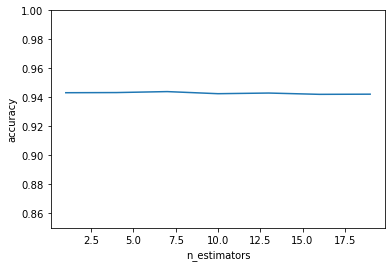

In [121]:
# plot test scores and n_estimators
# plot
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.85, 1])
plt.show()

- Insights: From above plot we can say that 7 trees give maximum accuracy

In [122]:
ABClassifier = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = 7)
    
ABClassifier.fit(X_train, y_train)
y_pred = ABClassifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[8103  145]
 [ 358  380]]


In [123]:
# Importing classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8248
           1       0.72      0.51      0.60       738

    accuracy                           0.94      8986
   macro avg       0.84      0.75      0.79      8986
weighted avg       0.94      0.94      0.94      8986



In [124]:
print(round(metrics.precision_score(y_test, y_pred),3))
print(round(metrics.recall_score(y_test,y_pred),3))

0.724
0.515


### Random Forest Classifier

In [125]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with 13 trees
rfc = RandomForestClassifier(n_estimators=7)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=7)

In [126]:
# Making predictions
predictions = rfc.predict(X_test)

# Importing classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8248
           1       0.71      0.48      0.58       738

    accuracy                           0.94      8986
   macro avg       0.83      0.73      0.77      8986
weighted avg       0.94      0.94      0.94      8986



Grid search for optimal parameters for Random Forests

In [127]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,12,16,20],
    'min_samples_leaf': range(10, 20, 30),
    'min_samples_split': range(10, 30, 50),
    'n_estimators': [5,10,15,20], 
    'max_features': [5, 10, 15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.0s


In [ ]:
# optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fit the best model

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=15,
                             n_estimators=20)

In [ ]:
# fit
rfc.fit(X_train,y_train)

In [ ]:
# predict
predictions = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(round(metrics.precision_score(y_test, y_pred),3))
print(round(metrics.recall_score(y_test,y_pred),3))

## Conclusion

- Models
    
    - Logistic Regression with PCA
    - Logistic Regression with RFE and VIF
    - Decision Tree Classifier
    - AdaBoost Classifier 
    - Random Forest Classifier


| Models | Test - Precision | Test - Recall |
| --- | --- | --- |
| Logistic Regression with PCA | 83.5 | 29.3 |
| Logistic Regression with RFE and VIF | 83.6 | 26.3 |
| Decision Tree Classifier | 76.4 | 41.3 |
| AdaBoost Classifier | 72.4 | 51.5 |
| Random Forest Classifier | 72.4 | 51.5 |

- From above, almost on all models are similar to each other and more often than not there is a trade off between precision and recall
- From accuracy metrics we will go ahead with Random forests


#### Important Features

In [ ]:
feature_imp = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_imp.head(10)

#### Business Insights

* Roaming rates must be considered by telecom companies. Customers that use services from a roaming zone should be offered attractive deals. 
* The corporation should concentrate on STD and ISD prices. Perhaps the rates are excessively high. Provide them with STD and ISD packages, if possible. 
* To address both of the aforementioned concerns, it is desirable that the telecom business collects customer query and complaint data and tailors their services to their demands.
* Feature loc_ic_t2m_mou_8 mean local incoming calls for Operator T to other operator mobile Minutes of usage - voice calls in August month came out to be the most important feature
* Decrease in 2G usage for Month 8 shows an increase trend of churn.